# Project Part III: Machine learning
## Team 11
| Name | unique name |
|---|---|
|Yen-wen Chin | yenwench |
|Yan-Ni Tai | yannitai |
|Seung Seok Lee|seogie|

## Project Overview

The project leverages machine learning models to analyze H1B visa application data, with the goal of predicting application outcomes and understanding regional employment characteristics across the U.S.

### Objectives

1. **Classification of H1B Case Status**: Utilize a Random Forest Classifier to predict whether an H1B visa application will be approved or denied.
2. **Classification of US Regions in Wage and Employment**: Use a Decision Tree Classifier to analyze if regional differences in wages, employment sectors, and visa allocations can predict geographical classifications of U.S. states.
3. **Clustering Analysis**: Employ K-means clustering to discover socio-economic groups within the U.S., based on the 2020 dataset, and to explore what insights these clusters provide about regional economic disparities and employment characteristics.

### Research Questions

1. Can the prevailing wage, the state of the worker, and the state of the employer be used to predict the status of an H1B visa application?
2. Can regional differences in wages, employment sectors, and visa allocations predict the geographical classification of U.S. states?
3. What are the distinct socio-economic groups within the U.S. population that can be revealed by clustering the 2020 dataset, and what insights can these clusters offer about regional economic disparities and employment characteristics?


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import missingno as msno
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

## Preprocessing Data
### Data Sources

Kaggle: [H-1B, H-1B1, E-3 Visa Petitions 2017 - 2022](https://www.kaggle.com/datasets/jishnukoliyadan/lca-programs-h1b-h1b1-e3-visa-petitions?resource=download)

Kaggle: [Living Wage - 50 States](https://www.kaggle.com/datasets/brandonconrady/living-wage-50-states)

Kaggle: [US Minimum Wage by State from 1968 to 2020](https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017)

## H-1B, H-1B1, E-3 Visa Petitions 2017 - 2022
### Read the data and add the year column.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Create a data frame to store the H1B data
H1B_Dataset = pd.DataFrame()

# Use for loop through the years 2017 to 2020
for year in range(2017, 2021):

    file_name = f'./data/LCA_FY_{year}.csv'

    # Read the data from the csv file
    df = pd.read_csv(file_name)

    # Add year column to the data frame
    df['Year'] = year

    # Concatenate the data frame to the H1B_Dataset
    H1B_Dataset = pd.concat([H1B_Dataset, df], ignore_index=True)

C:\Users\sandy\AppData\Local\Temp\ipykernel_29628\1356013121.py:14: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


### Handling the missing values

<Axes: >

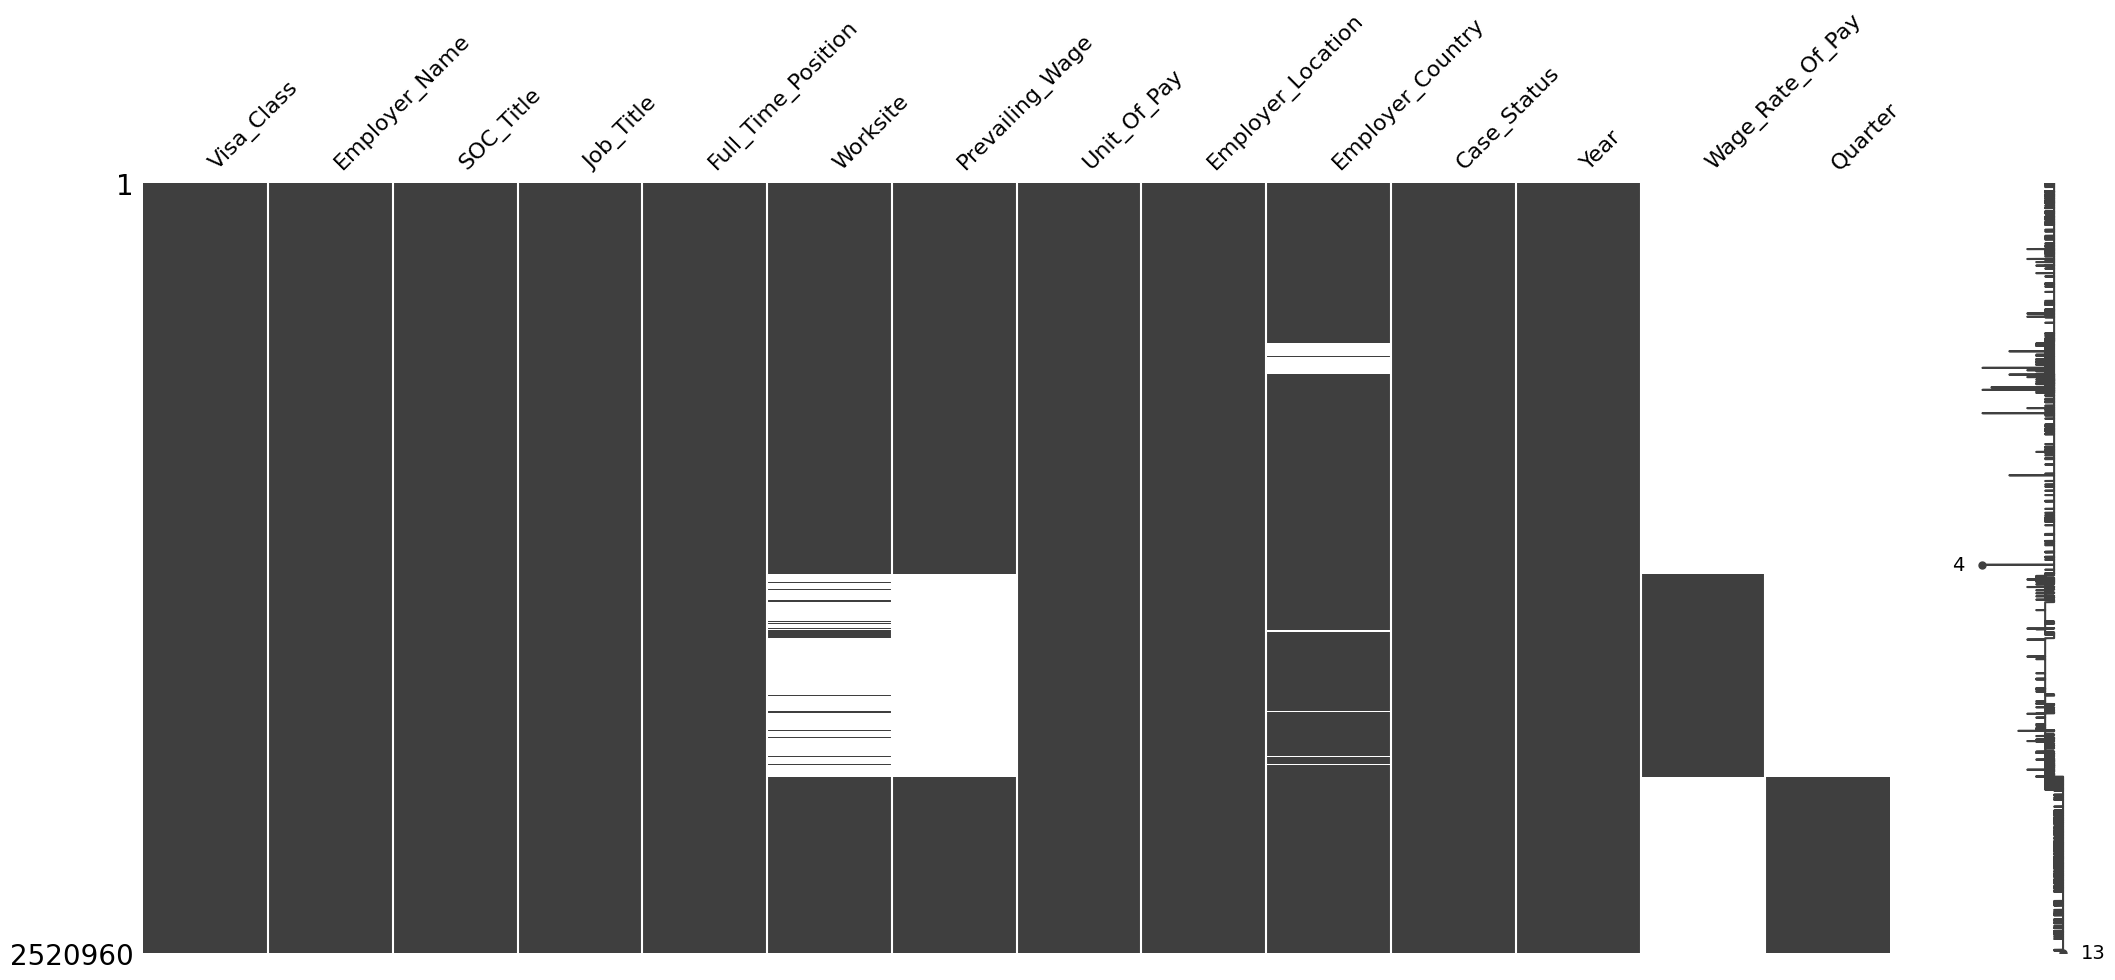

In [ ]:
msno.matrix(H1B_Dataset)

According to the missing values graph, most of the missing values are related to column "Quarter" and we drop those columns.

In [4]:
H1B_Dataset.drop(['Quarter'], axis=1, inplace=True)
H1B_Dataset

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Employer_Country,Case_Status,Year,Wage_Rate_Of_Pay
0,H-1B,DISCOVER PRODUCTS INC.,Computer Systems Analysts,ASSOCIATE DATA INTEGRATION,Y,"Riverwoods, Illinois",59197.00,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
1,H-1B,DFS SERVICES LLC,Operations Research Analysts,SENIOR ASSOCIATE,Y,"Riverwoods, Illinois",49800.00,Year,"Riverwoods, Illinois",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
2,H-1B,EASTBANC TECHNOLOGIES LLC,Computer Programmers,.NET SOFTWARE PROGRAMMER,Y,"Washington, District of Columbia",76502.00,Year,"Washington, District of Columbia",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
3,H-1B,INFO SERVICES LLC,"Computer Occupations, All Other",PROJECT MANAGER,Y,"Jersey City, New Jersey",90376.00,Year,"Livonia, Michigan",United States Of America,WITHDRAWN,2017,NaN
4,H-1B,BB&T CORPORATION,Credit Analysts,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,Y,"New York, New York",116605.00,Year,"Wilson, North Carolina",United States Of America,CERTIFIED-WITHDRAWN,2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520955,E-3 Australian,Flat Tech Inc.,Chief Executives,Chief Financial Officer,Y,"San Diego, California",274310.00,Year,"Schaumburg, Illinois",United States Of America,Withdrawn,2020,NaN
2520956,E-3 Australian,We Work Management LLC,Sales Managers,Account Director,Y,"New York, New York",110594.00,Year,"New York, New York",United States Of America,Withdrawn,2020,NaN
2520957,E-3 Australian,Agassiz Baldwin Community,Teacher Assistants,OST Teacher,N,"Cambridge, Massachusetts",19.73,Hour,"Cambridge, Massachusetts",United States Of America,Withdrawn,2020,NaN
2520958,E-3 Australian,Houzz Inc.,Lawyers,Houzz Inc.,Y,"Santa Monica, California",131310.00,Year,"Palo Alto, California",United States Of America,Withdrawn,2020,NaN


In [5]:
H1B_Dataset['Prevailing_Wage'] = H1B_Dataset['Prevailing_Wage'].fillna(H1B_Dataset['Wage_Rate_Of_Pay'])

### Select the rows that visa status is 'H1B'
Because we only analysed the data in the USA, we dropped the data outside the country.

In [7]:
tmp = H1B_Dataset[H1B_Dataset['Visa_Class'] == 'H-1B']
tmp.Visa_Class.value_counts()

Visa_Class
H-1B    2463157
Name: count, dtype: int64

### Choose that employers are located in the United States

In [8]:
tmp = tmp[tmp.Employer_Country == 'United States Of America']
tmp.Employer_Country.value_counts()

# After making sure that the Employer_Country is only United States of America, we can drop the column
tmp.drop(['Employer_Country'], axis=1, inplace=True)

### Split the locations column into City and State.

In the provided information, the format specified for the "Worksite" column is "City, County, State."

However, we have selectively extracted only the "City" and "State" values for our analysis.

In [9]:
# The data in the Worksite format
comma_counts = tmp['Worksite'].str.count(',')
row_with_2_comma = tmp.Worksite[comma_counts == 2]
row_with_2_comma.unique()

array(['Tucson,, Arizona', 'Reston,, Virginia',
       'Pawtucket,, Rhode Island', ..., 'Middleburg Heights,, Ohio',
       'Middleburg Heights, Cuyahoga, Ohio', 'Eagan, Mn 55121, Minnesota'],
      dtype=object)

In [10]:
# Now we have extracted only the "City" and "State" values from the Worksite column
tmp['Worksite_city'] = tmp['Worksite'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)
tmp['Worksite_state'] = tmp['Worksite'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else x)

# Now we have extracted only the "City" and "State" values from the Employer_Location column
tmp['Employer_city'] = tmp['Employer_Location'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)
tmp['Employer_state'] = tmp['Employer_Location'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else x)


In [ ]:
Workstate_num = tmp['Worksite_state'].nunique()
Workstate_num

Employerstate_num = tmp['Employer_state'].nunique()
Employerstate_num

55

Apart from the 50 states, there are 5 special values which are District of Columbia, Guam, Puerto Rico, Northern Mariana Islands, and U.S. Virgin Islands. We keep these values in case we will need these data.

## Living Wage - 50 States


In [12]:
living_wage = pd.read_csv('./data/livingwage50states.csv')
living_wage.head()
living_wage.shape

(51, 16)

Living wage dataset are consist of 51 rows and 16 columns

Change the column name into more usable and readable ways
1. erase non essential information in name
2. chage first letter to capital letter

In [13]:
living_wage.rename(columns={'state_territory':'State', 'land_area_sqmi':'Land_area'}, inplace=True)
living_wage.columns = [col.capitalize() for col in living_wage.columns]

### Handling missing values

<Axes: >

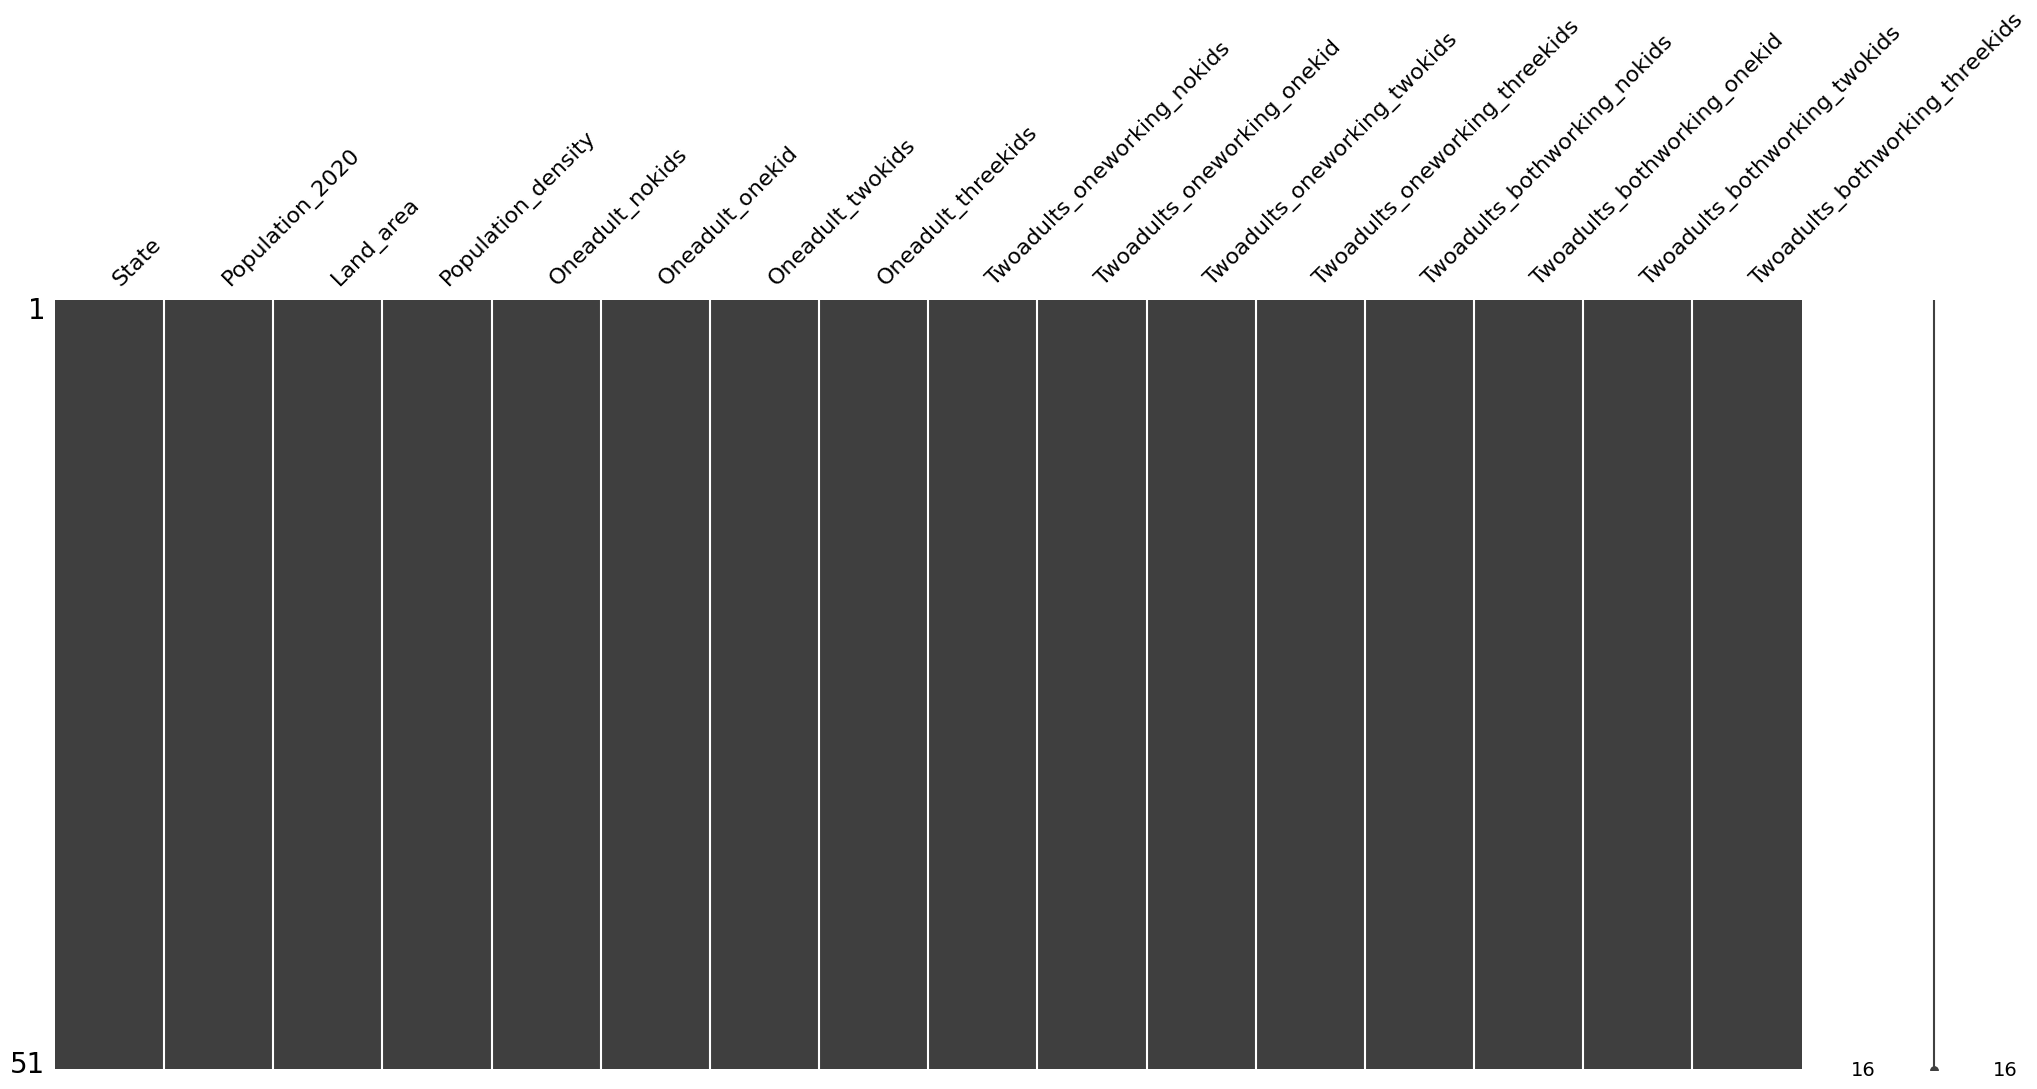

In [15]:
import missingno as msno
msno.matrix(living_wage)

To derive meaningful value from the all data in the column, we use average value for the rows with living wage.

In [16]:
avg_living_wage = (living_wage[['Oneadult_nokids','Oneadult_onekid',
                              'Oneadult_twokids', 'Oneadult_threekids', 'Twoadults_oneworking_nokids','Twoadults_oneworking_onekid', 'Twoadults_oneworking_twokids','Twoadults_oneworking_threekids', 'Twoadults_bothworking_nokids','Twoadults_bothworking_onekid', 'Twoadults_bothworking_twokids','Twoadults_bothworking_threekids']]
                              .astype(float)
                              .mean(axis=1))


living_wage['Average_living_wage'] = avg_living_wage

living_wage.sample(5)

,State,Population_2020,Land_area,Population_density,Oneadult_nokids,Oneadult_onekid,Oneadult_twokids,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage
2,Arizona,7151502,113594.08,62.96,14.94,29.01,35.11,45.59,24.30,28.69,32.42,36.13,12.15,15.99,19.51,23.01,26.404167
45,Vermont,643077,9216.66,69.77,14.93,31.77,39.96,52.38,24.37,29.21,32.92,35.84,12.18,17.34,22.20,26.45,28.295833
13,Illinois,12812508,55518.93,230.78,15.37,31.16,38.88,49.98,24.57,28.87,32.53,34.93,12.29,16.98,21.34,25.08,27.665000
47,Washington,7705281,66455.52,115.95,16.34,31.95,39.62,52.73,24.66,29.76,33.31,38.11,12.33,17.39,21.67,26.57,28.703333
27,Nebraska,1961504,76824.17,25.53,13.57,29.31,36.48,46.96,23.31,27.70,31.44,33.75,11.65,16.08,20.19,23.57,26.167500


In [17]:
living_wage_per_year = living_wage['Average_living_wage'] * 2080
living_wage['Average_living_wage_year'] = living_wage_per_year

living_wage.sample(5)

,State,Population_2020,Land_area,Population_density,Oneadult_nokids,Oneadult_onekid,Oneadult_twokids,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage,Average_living_wage_year
3,Arkansas,3011524,52035.48,57.87,13.29,28.23,34.85,44.48,22.50,27.15,30.85,32.89,11.25,15.54,19.35,22.33,25.225833,52469.733333
5,Colorado,5773714,103641.89,55.71,16.35,34.31,43.22,57.02,25.82,31.19,34.94,39.14,12.91,18.65,23.57,28.73,30.487500,63414.000000
23,Minnesota,5706494,79626.74,71.67,14.90,31.33,39.42,51.50,24.63,29.21,32.96,36.23,12.32,17.10,21.68,25.85,28.094167,58435.866667
2,Arizona,7151502,113594.08,62.96,14.94,29.01,35.11,45.59,24.30,28.69,32.42,36.13,12.15,15.99,19.51,23.01,26.404167,54920.666667
26,Montana,1084225,145545.80,7.45,13.94,29.63,37.54,49.03,23.06,27.69,31.55,34.43,11.53,16.35,20.79,24.74,26.690000,55515.200000


## US Minimum Wage by State from 1968 to 2020

In [19]:
min_wage = pd.read_csv('./data/Minimum Wage Data.csv', encoding='latin1')

Since we want to make sure that our column names are the same, we will change the columns into the suitable format.

In [20]:
# Replace dot sign with underscore sign
min_wage.columns = min_wage.columns.str.replace('.', '_', regex=False)

min_wage.columns

Index(['Year', 'State', 'State_Minimum_Wage',
       'State_Minimum_Wage_2020_Dollars', 'Federal_Minimum_Wage',
       'Federal_Minimum_Wage_2020_Dollars', 'Effective_Minimum_Wage',
       'Effective_Minimum_Wage_2020_Dollars', 'CPI_Average',
       'Department_Of_Labor_Uncleaned_Data',
       'Department_Of_Labor_Cleaned_Low_Value',
       'Department_Of_Labor_Cleaned_Low_Value_2020_Dollars',
       'Department_Of_Labor_Cleaned_High_Value',
       'Department_Of_Labor_Cleaned_High_Value_2020_Dollars', 'Footnote'],
      dtype='object')

### Handling missing values

<Axes: >

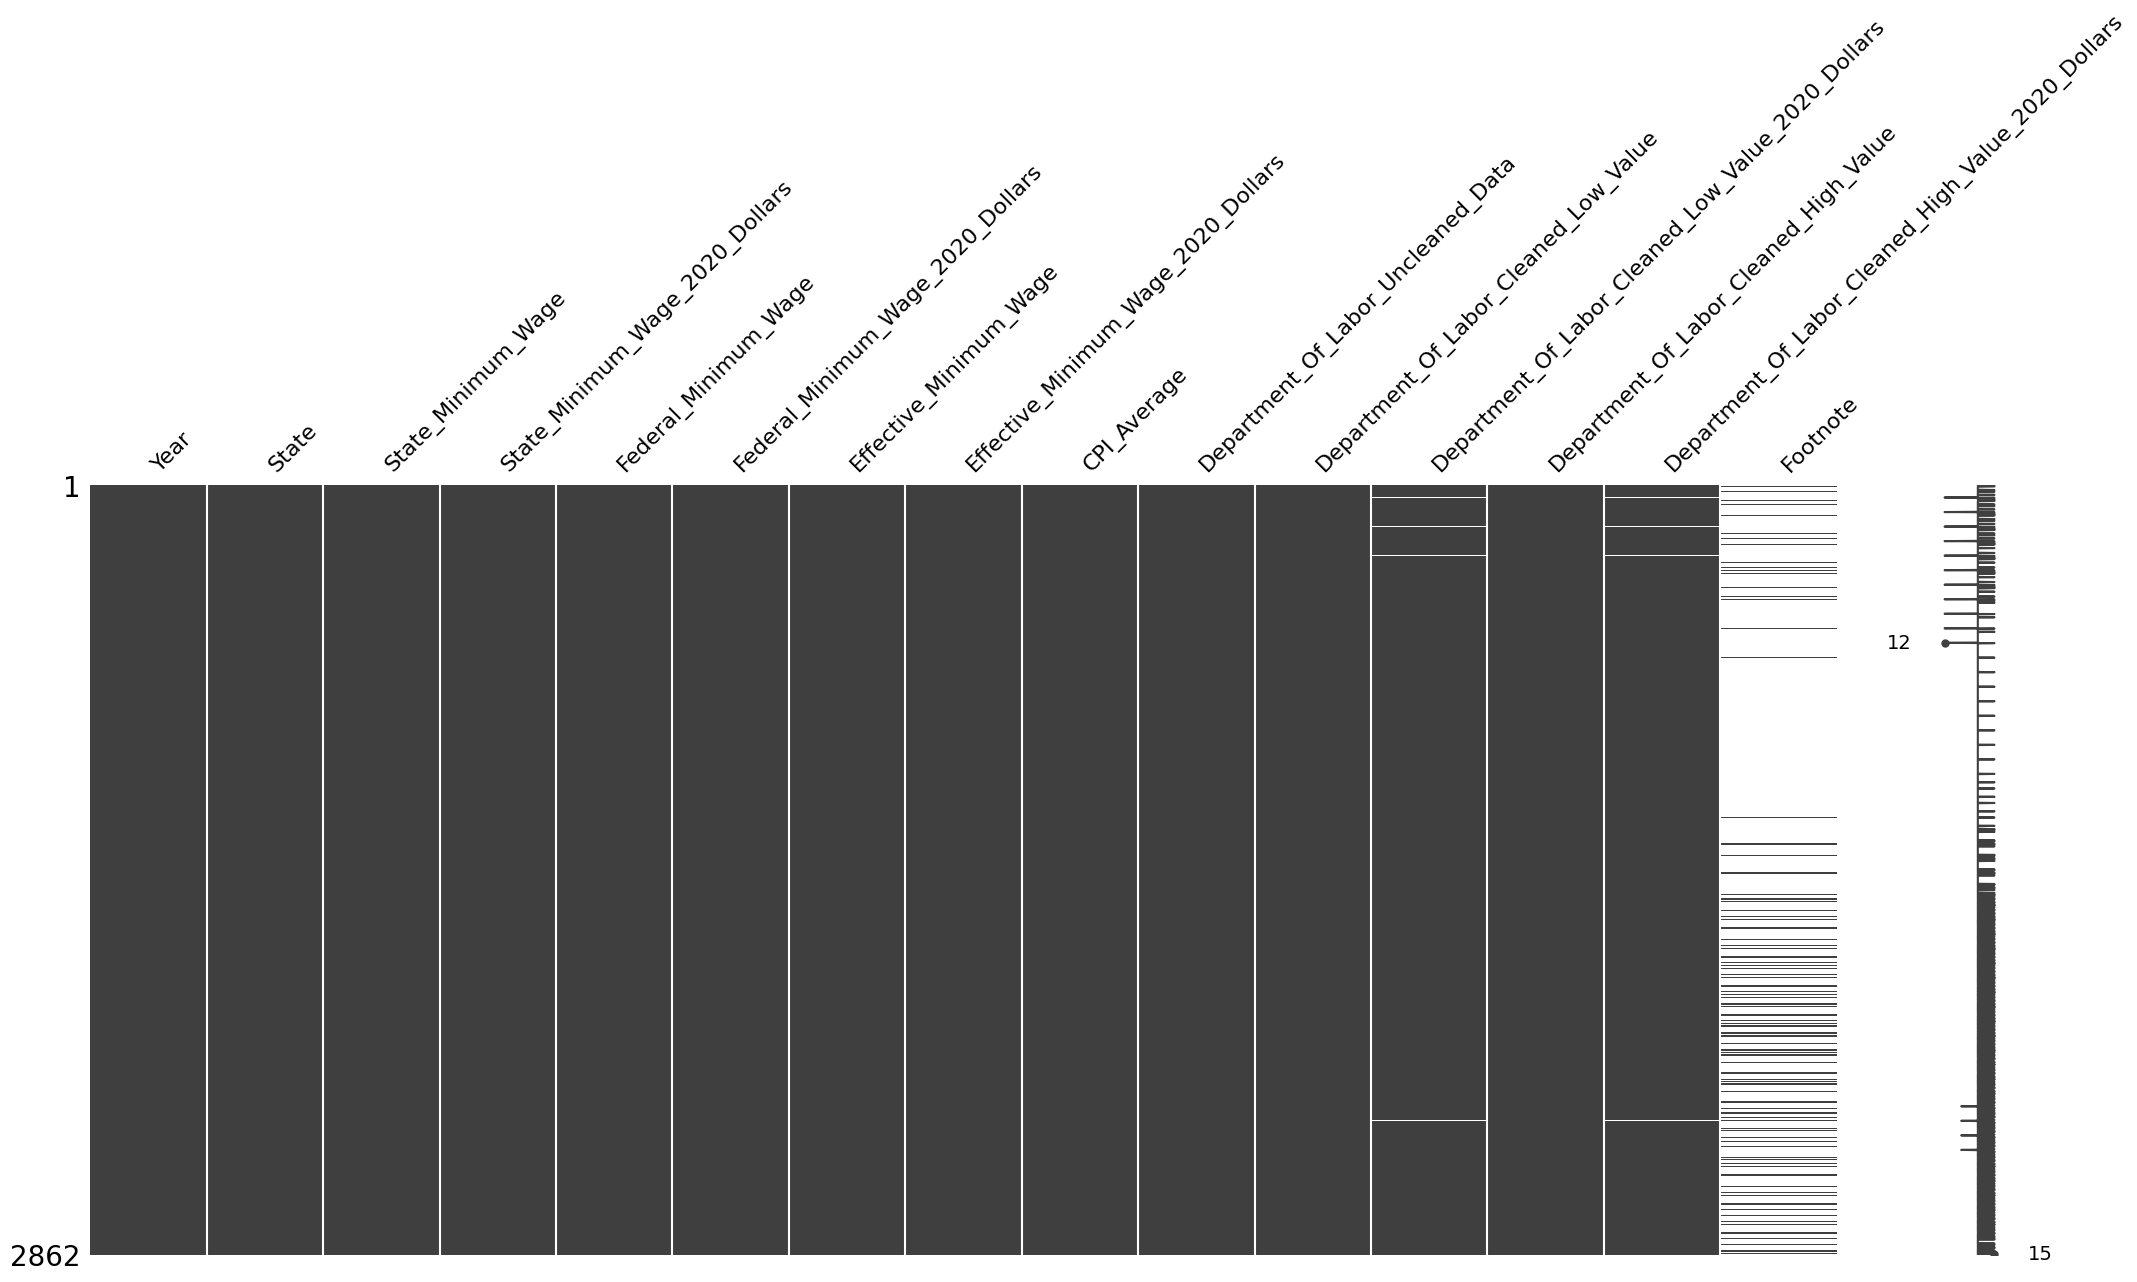

In [21]:
msno.matrix(min_wage)

 In the project, to investigate the effect of the minimum wage of each state on the number of H1B visas, we chose the analyzed time range to be from **2017 to 2020**.

After manipulating the dataset, the dataset contains the following characteristics:
* Numbers of observations: 216
* Numbers of features: 15

### Choose the time range from 2017 to 2020

In [22]:
min_wage_range = min_wage[(min_wage['Year'] >= 2017) & (min_wage['Year'] <= 2020)]
min_wage_range

,Year,State,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,Federal_Minimum_Wage_2020_Dollars,Effective_Minimum_Wage,Effective_Minimum_Wage_2020_Dollars,CPI_Average,Department_Of_Labor_Uncleaned_Data,Department_Of_Labor_Cleaned_Low_Value,Department_Of_Labor_Cleaned_Low_Value_2020_Dollars,Department_Of_Labor_Cleaned_High_Value,Department_Of_Labor_Cleaned_High_Value_2020_Dollars,Footnote
2646,2017,Alabama,0.00,0.00,7.25,7.65,7.25,7.65,245.12,...,0.00,0.00,0.00,0.00,NaN
2647,2017,Alaska,9.80,10.34,7.25,7.65,9.80,10.34,245.12,9.8,9.80,10.34,9.80,10.34,NaN
2648,2017,Arizona,10.00,10.55,7.25,7.65,10.00,10.55,245.12,10,10.00,10.55,10.00,10.55,NaN
2649,2017,Arkansas,8.50,8.97,7.25,7.65,8.50,8.97,245.12,8.50[c],8.50,8.97,8.50,8.97,[c]
2650,2017,California,10.00,10.55,7.25,7.65,10.00,10.55,245.12,10,10.00,10.55,10.00,10.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25,7.25,7.25,7.25,[c]
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50,13.50,13.50,13.50,NaN
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75,8.75,8.75,8.75,NaN
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN


Then, since we do not need the raw scraped data and the upper and lower bond of the data, we will drop columns
`Department_Of_Labor_Uncleaned_Data`, `Department_Of_Labor_Cleaned_Low_Value`, `Department_Of_Labor_Cleaned_Low_Value_2020_Dollars`,
`Department_Of_Labor_Cleaned_High_Value`, `Department_Of_Labor_Cleaned_High_Value_2020_Dollars`, `Footnote`.

In [ ]:
# Drop off the selected columns list above than create a new dataset
min_wage_range = min_wage_range.iloc[:,0:9]
min_wage_range

,Year,State,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,Federal_Minimum_Wage_2020_Dollars,Effective_Minimum_Wage,Effective_Minimum_Wage_2020_Dollars,CPI_Average
2646,2017,Alabama,0.00,0.00,7.25,7.65,7.25,7.65,245.12
2647,2017,Alaska,9.80,10.34,7.25,7.65,9.80,10.34,245.12
2648,2017,Arizona,10.00,10.55,7.25,7.65,10.00,10.55,245.12
2649,2017,Arkansas,8.50,8.97,7.25,7.65,8.50,8.97,245.12
2650,2017,California,10.00,10.55,7.25,7.65,10.00,10.55,245.12
...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66


#### Transform the hourly wage into year wage
Since the wage in the dataset is hourly wage, we will transform the columns into year wage for further analysis.
In this case we will assume that people work 40 hours per week, and 52 weeks per year, then we will create new columns base on the criteria mentioned.

The added columns for annual wage are `State_Minimum_Wage_Yearly`,  `State_Minimum_Wage_2020_Dollars_Yearly`, `Federal_Minimum_Wage_Yearly`, `Federal_Minimum_Wage_2020_Dollars_Yearly`, `Effective_Minimum_Wage_Yearly`, and `Effective_Minimum_Wage_2020_Dollars_Yearly`.

In [ ]:
text = '_Yearly'
for col_name in min_wage_range.columns[2:8]:
    new_col_name = col_name + text
    min_wage_range[new_col_name] = min_wage_range[col_name] * 2080

min_wage_range

,Year,State,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,Federal_Minimum_Wage_2020_Dollars,Effective_Minimum_Wage,Effective_Minimum_Wage_2020_Dollars,CPI_Average,State_Minimum_Wage_Yearly,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly
2646,2017,Alabama,0.00,0.00,7.25,7.65,7.25,7.65,245.12,0.0,0.0,15080.0,15912.0,15080.0,15912.0
2647,2017,Alaska,9.80,10.34,7.25,7.65,9.80,10.34,245.12,20384.0,21507.2,15080.0,15912.0,20384.0,21507.2
2648,2017,Arizona,10.00,10.55,7.25,7.65,10.00,10.55,245.12,20800.0,21944.0,15080.0,15912.0,20800.0,21944.0
2649,2017,Arkansas,8.50,8.97,7.25,7.65,8.50,8.97,245.12,17680.0,18657.6,15080.0,15912.0,17680.0,18657.6
2650,2017,California,10.00,10.55,7.25,7.65,10.00,10.55,245.12,20800.0,21944.0,15080.0,15912.0,20800.0,21944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66,15080.0,15080.0,15080.0,15080.0,15080.0,15080.0
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,28080.0,28080.0,15080.0,15080.0,28080.0,28080.0
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,18200.0,18200.0,15080.0,15080.0,18200.0,18200.0
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,15080.0,15080.0,15080.0,15080.0,15080.0,15080.0


### Get data information
There are a total 216 observations and 15 columns in our dataset.

The columns after dealing with the dataset will be

|Column | Description |
|---|---|
|*Year*| The year of the data|
|*States*|The state of the data|
|*State_Minimum_Wage*| The state’s minimum wage of Jan 1st|
|*State_Minimum_Wage_2020_Dollars*| The state's minimum wage in 2020 dollar value|
|*Federal_Minimum_Wage*| The federal minimum wage as of January 1 of the given year|
|*Federal_Minimum_Wage_2020_Dollars*| The federal minimum wage in 2020 dollar value, adjusted for inflation|
|*Effective_Minimum_Wage*| The effective minimum wage in the state on January 1 of the given year, which is the higher of the state or federal minimum wage|
|*Effective_Minimum_Wage_2020_Dollars*| The effective minimum wage in 2020 dollar value, which is the higher of the state or federal minimum wage|
|*CPI_Average*| The average value of the Consumer Price Index in Year|
|*State_Minimum_Wage_Yearly*| The state’s minimum wage of Jan 1st in annual wage|
|*State_Minimum_Wage_2020_Dollars_Yearly*| The state's minimum wage in annual wage in 2020 dollar value|
|*Federal_Minimum_Wage_Yearly*| The federal minimum wage as of January 1 of the given year in annual wage|
|*Federal_Minimum_Wage_2020_Dollars_Yearly*| The federal minimum wage in annual wage in 2020 dollar value, adjusted for inflation|
|*Effective_Minimum_Wage_Yearly*| The effective minimum wage in the state on January 1 of the given year in annual wage, which is the higher of the state or federal minimum wage|
|*Effective_Minimum_Wage_2020_Dollars_Yearly*| The effective minimum wage in annual wage in 2020 dollar value, which is the higher of the state or federal minimum wage|


#### After all, we merge the three data sets into one and save as merge_dataset.

## Model 1: Classification of H1B Case status
### Objective Question
#### Can the prevailing wage, the state of the worker, and the state of the employer be used to predict the status of an H1B visa application?

### Motivation
We know that the common reasons for Denial of an H1B visa application include:
- the job itself doesn't require specialized knowledge or skills
- no direct work relationship between employer and employee has been proven

This study aims to explore whether the prevailing wage, the state of the worker, and the state of the employer can provide additional insights into the H1B visa application status. Specifically, we seek to determine if these factors correlate with the approval or denial of an application, complementing the common reasons for denial, such as the lack of specialized knowledge required for the job and the absence of a direct employer-employee relationship.

In [9]:
df = pd.read_csv('./dataset/merge_dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

### Data Preprocessing

We need to identify and select the relevant columns from the combined dataset that will serve as key factors in our analysis. 

These columns should specifically pertain to the prevailing wage, the state of the worker, and the state of the employer to effectively investigate their influence on the status of H1B visa applications.

In [10]:
df.columns

Index(['Visa_Class', 'Employer_Name', 'SOC_Title', 'Job_Title',
       'Full_Time_Position', 'Worksite', 'Prevailing_Wage', 'Unit_Of_Pay',
       'Employer_Location', 'Case_Status', 'Year', 'Worksite_city',
       'Worksite_state', 'Employer_city', 'Employer_state', 'State_x',
       'State_Minimum_Wage', 'State_Minimum_Wage_2020_Dollars',
       'Federal_Minimum_Wage', 'Federal_Minimum_Wage_2020_Dollars',
       'Effective_Minimum_Wage', 'Effective_Minimum_Wage_2020_Dollars',
       'CPI_Average', 'State_Minimum_Wage_Yearly',
       'State_Minimum_Wage_2020_Dollars_Yearly', 'Federal_Minimum_Wage_Yearly',
       'Federal_Minimum_Wage_2020_Dollars_Yearly',
       'Effective_Minimum_Wage_Yearly',
       'Effective_Minimum_Wage_2020_Dollars_Yearly', 'State_y',
       'Population_2020', 'Land_area', 'Population_density', 'Oneadult_nokids',
       'Oneadult_onekid', 'Oneadult_twokids', 'Oneadult_threekids',
       'Twoadults_oneworking_nokids', 'Twoadults_oneworking_onekid',
       'Twoadul

#### Select the categorical factors
Initially, we will enumerate all the categorical columns in our dataset and assess the number of unique entries in each specific categorical column to better understand their variability and relevance to our analysis.

In [11]:
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Visa_Class', 'Employer_Name', 'SOC_Title', 'Job_Title',
       'Full_Time_Position', 'Worksite', 'Unit_Of_Pay', 'Employer_Location',
       'Case_Status', 'Worksite_city', 'Worksite_state', 'Employer_city',
       'Employer_state', 'State_x', 'State_y'],
      dtype='object')


In [12]:
num_unique_values = df['SOC_Title'].nunique()
print("Number of different values in SOC_Title:", num_unique_values)

num_unique_values = df['Job_Title'].nunique()
print("Number of different values in Job_Title:", num_unique_values)

num_unique_values = df['Employer_Location'].nunique()
print("Number of different values in Employer_Location:", num_unique_values)

num_unique_values = df['Worksite_state'].nunique()
print("Number of different values in Worksite_state:", num_unique_values)

num_unique_values = df['Full_Time_Position'].nunique()
print("Number of different values in Full_Time_Position:", num_unique_values)

num_unique_values = df['Employer_state'].nunique()
print("Number of different values in Employer_state:", num_unique_values)

num_unique_values = df['State_x'].nunique()
print("Number of different values in State_x:", num_unique_values)

num_unique_values = df['State_y'].nunique()
print("Number of different values in State_y:", num_unique_values)

Number of different values in SOC_Title: 870
Number of different values in Job_Title: 121832
Number of different values in Employer_Location: 6826
Number of different values in Worksite_state: 51
Number of different values in Full_Time_Position: 2
Number of different values in Employer_state: 54
Number of different values in State_x: 51
Number of different values in State_y: 51


Initially, we selected eight specific columns to examine their values.

Upon analysis, we observed that the columns for SOC_Title, Employer_Location, and Employee_Location contained an excessively large number of unique values, which could potentially skew the results. 

Consequently, we decided to narrow our focus and selected only `Worksite_state`, `Full_Time_Position`, and `Employer_state` as our categorical factors for the study.

#### Select numerical factors

In [14]:
numeric_df = df.select_dtypes(include='number')
num_list = numeric_df.columns
num_list = num_list.drop(['Year'])
print(num_list)

Index(['Prevailing_Wage', 'State_Minimum_Wage',
       'State_Minimum_Wage_2020_Dollars', 'Federal_Minimum_Wage',
       'Federal_Minimum_Wage_2020_Dollars', 'Effective_Minimum_Wage',
       'Effective_Minimum_Wage_2020_Dollars', 'CPI_Average',
       'State_Minimum_Wage_Yearly', 'State_Minimum_Wage_2020_Dollars_Yearly',
       'Federal_Minimum_Wage_Yearly',
       'Federal_Minimum_Wage_2020_Dollars_Yearly',
       'Effective_Minimum_Wage_Yearly',
       'Effective_Minimum_Wage_2020_Dollars_Yearly', 'Population_2020',
       'Land_area', 'Population_density', 'Oneadult_nokids', 'Oneadult_onekid',
       'Oneadult_twokids', 'Oneadult_threekids', 'Twoadults_oneworking_nokids',
       'Twoadults_oneworking_onekid', 'Twoadults_oneworking_twokids',
       'Twoadults_oneworking_threekids', 'Twoadults_bothworking_nokids',
       'Twoadults_bothworking_onekid', 'Twoadults_bothworking_twokids',
       'Twoadults_bothworking_threekids', 'Average_living_wage',
       'Average_living_wage_year'],


In our dataset, while reviewing all numeric columns, we chose to focus solely on `Prevailing_Wage` as our primary numerical factor. This decision was driven by its direct relevance to H1B visa applicants. `Prevailing_Wage` encapsulates critical financial considerations of the visa application process, reflecting the economic value of the jobs offered to applicants. This makes it a key variable in assessing the factors that could influence the outcome of H1B visa applications.

The factors under consideration in our analysis are categorized into numerical and categorical types as follows:

- **Numerical Factors**: `Prevailing_Wage` is selected as the key numerical factor due to its direct relevance to the H1B visa process, representing the economic evaluation of the positions offered to applicants.

- **Categorical Factors**: These include `Worksite_state`, `Full_Time_Position`, and `Employer_state`, chosen for their potential impact on the visa application outcomes.

This distinction helps streamline our analysis by focusing on variables most likely to influence the H1B visa approval process.

In [15]:
cat_attribs = ['Full_Time_Position', 'Employer_state', 'Worksite_state']
num_attribs = ['Prevailing_Wage']

### Correlation Analysis and Skewness Assessment
In this analysis, we employ a **heatmap** to visualize the correlations among numerical variables, and we use the `skew()` function to assess the skewness of the data. These tools are instrumental in understanding the structure of our dataset. By identifying **correlations** and evaluating **skewness**, we can pinpoint which variables may require further processing. This ensures our data is well-prepared for robust statistical analysis or machine learning modeling, helping to enhance the accuracy and effectiveness of our predictions regarding H1B visa application outcomes.

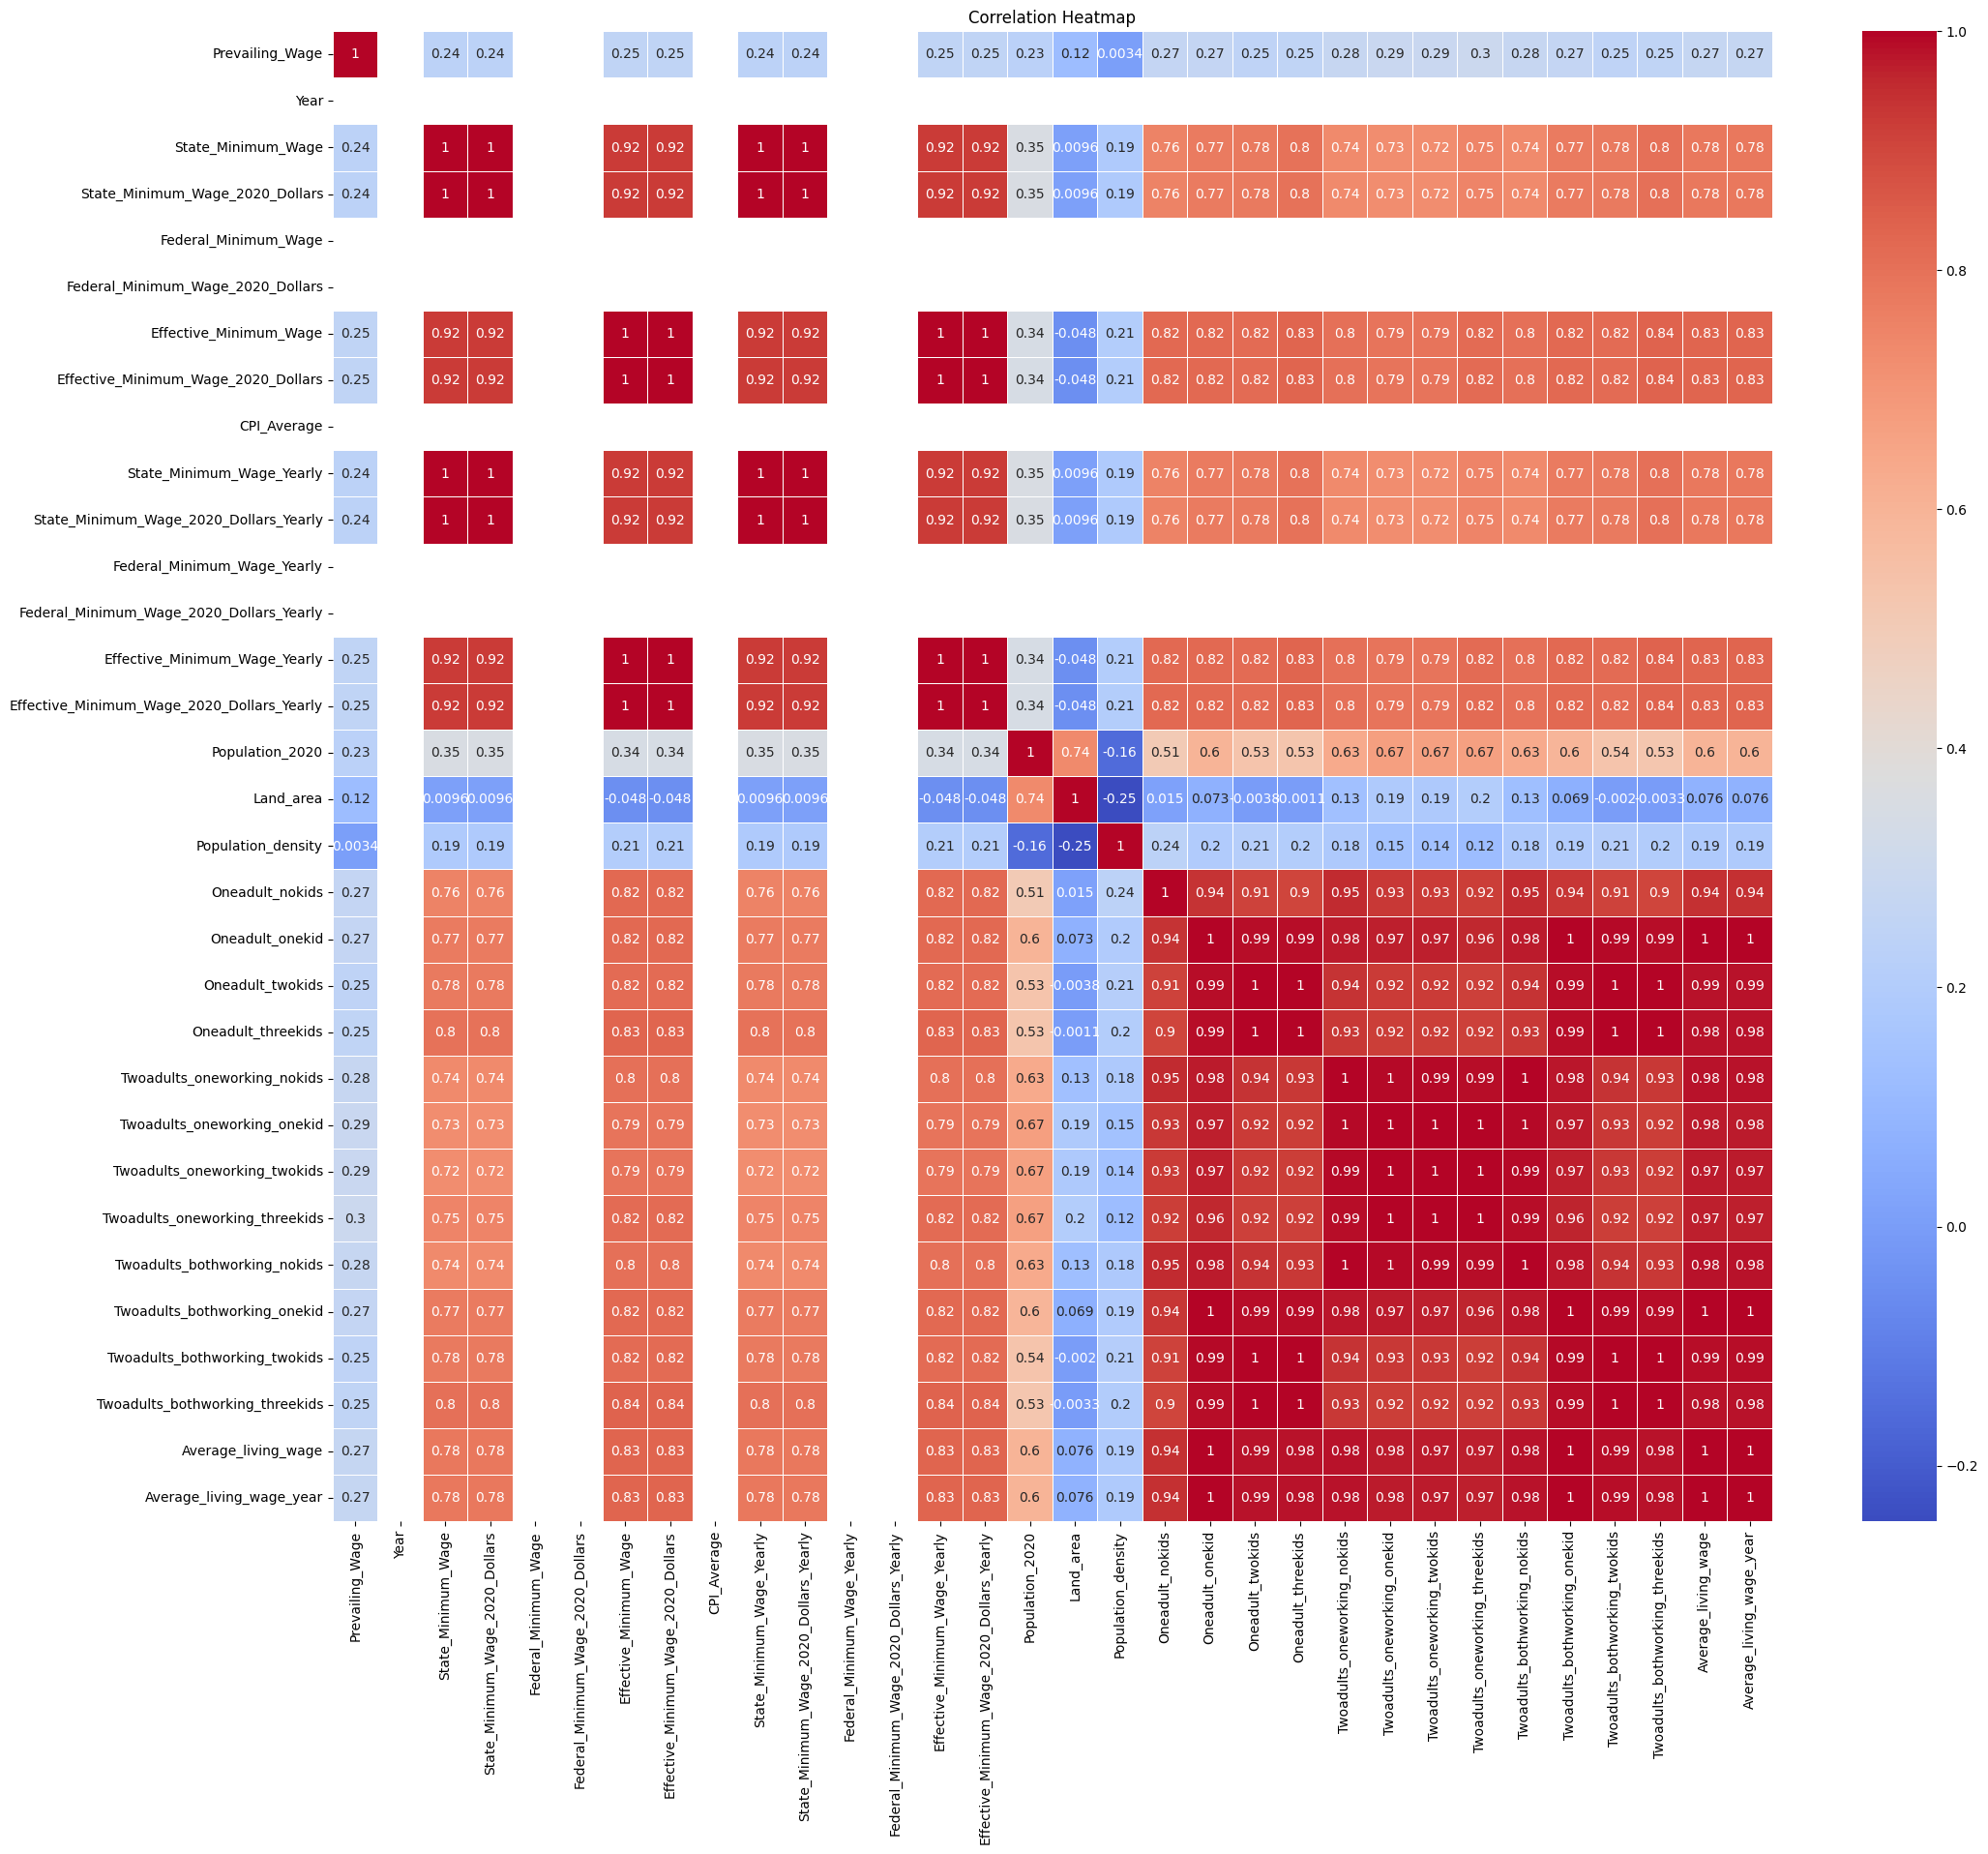

In [16]:
numeric_df = df.select_dtypes(include='number')
# Create correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

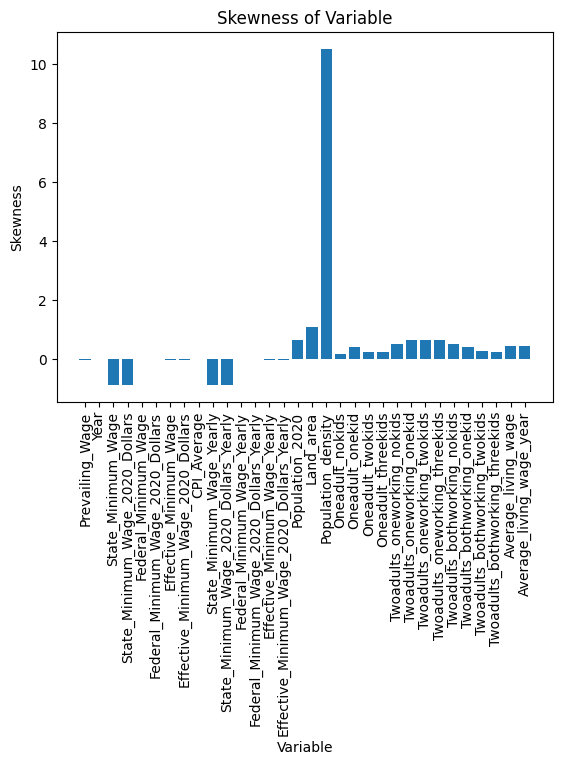

In [17]:
# Calculate skewness
skewness = numeric_df.skew()

# Create a bar plot
plt.bar(numeric_df.columns, skewness)
plt.xlabel('Variable')
plt.ylabel('Skewness')
plt.title('Skewness of Variable')
plt.xticks(rotation=90) 
plt.show()

According to the heatmap analysis, there are significant correlations observed between the `N_adult_with_N_kids`, `living wage` and other related columns. Additionally, strong correlations exist among various columns associated with living wages. These correlations are primarily due to the fact that these columns all pertain to similar economic factors, reflecting the interconnected nature of wage-related data points within our dataset.

From the skewness analysis, the `population_density` column exhibits significant right skewness. Given this, it is necessary to apply a transformation to this column if it is to be included in further analyses. Such a transformation would help normalize the data distribution, enhancing the reliability and validity of any statistical or machine learning models that use this variable.

Given these findings, it is imperative to implement feature scaling across our dataset. This step will ensure uniformity in the scale of numeric inputs, enhancing the performance and accuracy of our subsequent statistical or machine learning analyses. By adjusting for scale discrepancies and normalizing distributions, we can improve the predictive reliability of our models and ensure a more robust analytical framework.

### Target assessment
In this section, we will examine the quantity of our target data points. This step is crucial for understanding the scale of our dataset and ensuring that we have a sufficient number of observations to conduct a robust analysis. It will help in assessing the representativeness and statistical significance of our findings.


In addition to examining our target data points, we will modify the `case_status` attribute in our dataset. Specifically, cases that are 'certified' will be coded as '1', and those that are 'withdrawn' will be coded as '0'. This binary transformation simplifies the analysis by allowing us to apply statistical and machine learning methods that work with numeric data, facilitating a more straightforward assessment of the factors influencing H1B visa application outcomes.

In [18]:
df['Case_Status'].value_counts()

Case_Status
Certified                533105
Certified - Withdrawn     14726
Withdrawn                 10334
Denied                     3407
Name: count, dtype: int64

Based on our review, the dataset contains four distinct case statuses: 'Certified', 'Certified - Withdrawn', 'Withdrawn', and 'Denied'. 

As our analysis aims to predict the approval of H1B visa applications, we will focus only on cases that clearly indicate approval or denial. Consequently, we will exclude the 'Withdrawn' cases from our dataset. 

This decision helps streamline our analysis by concentrating on the most relevant outcomes—whether an application is likely to be approved or denied.

In [19]:
df_2 = df.copy()
df_2 = df_2[df['Case_Status'] != 'Withdrawn']
df_2.loc[df_2['Case_Status'].str.contains('Certified'), 'Case_Status'] = 'Certified'

In [20]:
df_2['Case_Status'] = df_2['Case_Status'].map({'Certified': 1, 'Denied': 0})
df_2['Case_Status'] = df_2['Case_Status'].fillna(value=0)
df_2['Case_Status'] = df_2['Case_Status'].astype(int)

In [21]:
df_2['Case_Status'].value_counts()

Case_Status
1    547831
0      3407
Name: count, dtype: int64

At the conclusion of our preliminary data assessment, we observed a significant imbalance in the distribution of case statuses. This imbalance poses a challenge for predictive modeling, as the disproportionate number of cases in certain categories may lead to biased or inaccurate predictions. Addressing this issue will be crucial for developing a robust model that can effectively predict the outcomes of H1B visa applications.

### Train and tune the model Process
1. OneHotEncoder
2. SMOTE
3. PCA
4. Logistic Regression
5. Random Forest Classification

In [22]:
X = df_2[cat_attribs + num_attribs]
y= df_2['Case_Status']

Here we are going to preprocess the dataset in preparation for machine learning modeling by applying different transformations to different types of data within the same pipeline:
- **Categorical Features**: The categorical features are transformed using OneHotEncoder, which converts each category value into a new binary column, thereby avoiding any mathematical assumptions about the ordinal nature of the data.
- **Numerical Features**: The numerical features are passed through unchanged, as they do not require the binary encoding necessary for categorical data.

After applying the OneHotEncoder, we convert the data back into a DataFrame format, which prepares it for the next step: applying **SMOTE** to address class imbalance.

In [23]:
# Define a ColumnTransformer that processes categorical and numerical features differently
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_attribs),  # Apply OneHotEncoder to categorical attributes
    ('num', 'passthrough', num_attribs)     # Allow numerical attributes to pass through without transformation
])

# Fit the defined transformer to the data and transform it
X_transformed = preprocessor.fit_transform(X)

# Retrieve the feature names after OneHotEncoder transformation for categorical attributes
cat_one_hot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_attribs)

# Combine the new categorical feature names with the existing numerical feature names for the DataFrame columns
column_names = list(cat_one_hot_features) + num_attribs

# Convert the transformed data from a sparse matrix to a dense array
X_transformed_dense = X_transformed.toarray()

# Create a new DataFrame using the dense array, the combined column names, and retain the original data's index
X_transformed_df = pd.DataFrame(X_transformed_dense, columns=column_names, index=X.index)

#### SMOTE (Synthetic Minority Over-sampling Technique)
Due to significant imbalances in our target values, we employ **SMOTE** to make the data more uniform. This approach helps create synthetic samples from the minority class to achieve a more balanced dataset. 

After applying SMOTE, the transformed dataset X and target y are rebalanced, enhancing the training of our model by providing a more representative distribution of classes.

In [24]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_transformed_df, y)

#### PCA
We apply PCA (Principal Component Analysis) after splitting the data to avoid data leakage. This ensures that the dimensionality reduction process does not inadvertently incorporate knowledge from the test set, thereby preserving the integrity of our model evaluation.

In [25]:
full_pipeline = ColumnTransformer([
    ('num', PCA(n_components=0.95), num_attribs),
])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_trans = full_pipeline.fit_transform(X_train)
X_test_trans = full_pipeline.transform(X_test)

#### Logistic Regression
We choose the logistic regression for the following reasons:
1.  Firstly, it is particularly effective for binary classification problems, where the goal is to predict one of two possible outcomes. Its output, which is the probability of a particular class, provides a clear interpretation that is valuable for decision-making processes. 
2.  Additionally, Logistic Regression is a linear model, which makes it not only straightforward to implement but also efficient to train on large datasets. This simplicity also allows for easy interpretation of the impact of individual features on the prediction, an advantage when the goal is to understand the driving factors behind predictions.

In [31]:
model = LogisticRegression()
model.fit(X_train_trans, y_train)

train_accuracy = model.score(X_train_trans, y_train)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.5899496765081361


In [32]:
y_pred = model.predict(X_test_trans)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.5921700519775661
Confusion Matrix:
 [[63176 46490]
 [42879 66588]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59    109666
           1       0.59      0.61      0.60    109467

    accuracy                           0.59    219133
   macro avg       0.59      0.59      0.59    219133
weighted avg       0.59      0.59      0.59    219133



From this output, we can see that:
1. For class '0', precision is 0.59, meaning that when the model predicts class '0', it is correct 59% of the time.
2. For class '1', precision is also 0.59, indicating the model is equally precise in its predictions for class '1'.
3. The F1-score is a harmonic mean of precision and recall. For class '0', it's 0.58, and for class '1', it's slightly higher at 0.60, which suggests a more balanced performance for class '1' compared to class '0'.
4. The consistency between the training and testing precision suggests that overfitting is unlikely to be a concern in our model. The close alignment of these metrics indicates that the model generalizes well to unseen data, maintaining its predictive performance across both sets.

#### Random Forest Classification
We choose a random forest model based on the following considerations:
1. Random Forest is an ensemble learning method that is particularly good at handling non-linear data. 
2. While individual decision trees are prone to overfitting, Random Forest averages multiple trees to reduce the risk of overfitting. 

In [40]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier.fit(X_train_trans, y_train)

RandomForestClassifier(random_state=42)

In this section of the code, we're utilizing **Cross-Validation (CV)** to ensure that our RandomForestClassifier model is not only accurate but also stable across different subsets of the training data. Cross-Validation systematically divides the data into parts, trains the model on some of these parts, and validates it on the others. This process is repeated multiple times to get a reliable estimate of the model's performance.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_trans, y_train)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

In [41]:
y_train_pred = rf_classifier.predict(X_train_trans)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.8891719498156935


In [42]:
y_pred = rf_classifier.predict(X_test_trans)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8628777956765983
              precision    recall  f1-score   support

           0       0.88      0.84      0.86    109666
           1       0.85      0.89      0.87    109467

    accuracy                           0.86    219133
   macro avg       0.86      0.86      0.86    219133
weighted avg       0.86      0.86      0.86    219133



Based on the output shown in the image, we can draw several conclusions regarding the performance of the RandomForestClassifier on the test set:
1. The model has an accuracy of approximately 86.24%, indicating a high level of correct predictions across both classes.
2. The F1-score, which balances precision and recall, is 0.86 for class '0' and 0.87 for class '1'. These scores suggest that the model has a balanced performance for both precision and recall, particularly for class '1'.
3. The model’s consistent precision across training and test sets indicates no overfitting.

### Conclusion
In summary, the RandomForestClassifier exhibits strong predictive performance on the test set with high accuracy and a good balance between precision and recall. The model appears to perform slightly better in recognizing instances of class '1' over class '0'. As for logistic model, there is likely room for improvement, possibly through model tuning, feature engineering, or trying different algorithms. 

### Challenges
Our preprocessing approach incorporated SMOTE (Synthetic Minority Over-sampling Technique) to address the issue of imbalance in our target variable. While this technique is effective at creating a more balanced dataset by generating synthetic examples of the minority class, it's important to recognize that these synthetic samples are approximations, and their use might introduce a degree of artificial bias. Consequently, this can lead to discrepancies between our model's performance in a controlled test environment and its predictive accuracy in real-world applications, where the class distribution may differ significantly. Therefore, while the balanced dataset facilitates the training of our model and helps in achieving robust performance metrics, caution should be exercised when generalizing the results to ensure they reflect genuine patterns in the data rather than artifacts of the resampling process.

---

## Model 2: Classification of US Regions in Wage and Employment

### Objective Question:
#### Can regional differences in wages, employment sectors, and visa allocations predict the geographical classification of U.S. states?

### Motivation: 
We know that where you live can affect your job and how much money you make. The U.S. has different kinds of jobs and pay rates in the East compared to the West. This isn't just because of where these places are on the map; it's also about the types of industries there, what people value, and how they live. Our study wants to see if we can use things like average wages, minimum cost of livings, and how many work visas are given out, to tell if a state is in the East or the West.

### Data Loading

In this analysis, we aim to classify U.S. states into two groups, West and East, based on indicators including living costs, minimum wages, populations of 2020, and the number of H1B visas issued in 2020. Our dataset comprises 561,572 rows and 38 columns, providing a comprehensive foundation for exploring how these variables influence regional classifications.

In [43]:
# Load the dataset
df = pd.read_csv('merge_min_wage_H1B_living_wage.csv')
df.shape

(561572, 38)

In [44]:
df.head()

,Visa_Class,Worksite,Prevailing_Wage,Unit_Of_Pay,Year,Worksite_state,State_x,State_Minimum_Wage,State_Minimum_Wage_2020_Dollars,Federal_Minimum_Wage,...,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage,Average_living_wage_year
0,H-1B,"Hudson, Ohio",95118.0,Year,2020,Ohio,Ohio,8.70,8.70,7.25,...,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,25.4850,53008.8
1,H-1B,"Brentwood, Tennessee",39.0,Hour,2020,Tennessee,Tennessee,0.00,0.00,7.25,...,21.44,25.58,28.97,31.06,10.72,14.45,17.82,20.53,23.5925,49072.4
2,H-1B,"Dearborn, Michigan",39.0,Hour,2020,Michigan,Michigan,9.65,9.65,7.25,...,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,27.4875,57174.0
3,H-1B,"Taylor, Michigan",53.0,Hour,2020,Michigan,Michigan,9.65,9.65,7.25,...,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,27.4875,57174.0
4,H-1B,"Blue Ash, Ohio",65333.0,Year,2020,Ohio,Ohio,8.70,8.70,7.25,...,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,25.4850,53008.8


### Data Cleaning and Preprocessing

In this section, we will prepare our dataset through the following steps to ensure accurate and effective analysis:

1. **Standardizing Salary-Related Columns**:
   - Convert all wage-related columns to an annual wage unit to standardize salary data across the dataset.
   - Remove any columns that contain non-yearly salary figures after conversion to avoid redundancy and potential confusion.

2. **Feature Selection**:
   - Identify and select features that are directly relevant to our objective of classifying states into East and West groups. 
   - Focus on econometric variables, H1B visa counts, and other state-related characteristics such as population and land area, which are pertinent to our analysis.

3. **Exclusion of U.S. Territories**

4. **Geographical Grouping**:
   - Categorize the 50 states into West and East groups based on their geological features and industrial sectors. 
   - This classification will facilitate a more targeted exploration of regional differences and similarities.

These steps will enable us to clean and structure the dataset effectively, paving the way for a robust analytical framework that addresses our research objectives.

#### 1. Standardizing Salary-Related Columns

In the first part of the project (Data Merging Part), we converted all price-related columns to an annual wage unit. After converting, the salary-related data are as follows: `Prevailing_Wage`, `State_Minimum_Wage`, `State_Minimum_Wage_2020_Dollars`, `Federal_Minimum_Wage`, `Federal_Minimum_Wage_2020_Dollars`, `Effective_Minimum_Wage`, `Effective_Minimum_Wage_2020_Dollars`, `CPI_Average`, `State_Minimum_Wage_Yearly`, `State_Minimum_Wage_2020_Dollars_Yearly`, `Federal_Minimum_Wage_Yearly`, `Federal_Minimum_Wage_2020_Dollars_Yearly`, `Effective_Minimum_Wage_Yearly`, `Effective_Minimum_Wage_2020_Dollars_Yearly`, `Average_living_wage`, and `Average_living_wage_year`.

To simplify the dataset and focus on the year 2020:
- We will remove columns that contain non-yearly wage data to eliminate redundancy.
- We will retain only those salary-related features calculated with 2020 currency values to maintain consistency and relevance to our study's timeframe.

The remaining salary-related features for our analysis include:
- `Prevailing_Wage`
- `CPI_Average`
- `State_Minimum_Wage_2020_Dollars_Yearly`
- `Federal_Minimum_Wage_2020_Dollars_Yearly`
- `Effective_Minimum_Wage_2020_Dollars_Yearly`
- `Average_living_wage_year`

These adjustments ensure that our dataset contains only relevant and appropriately scaled financial data, thereby supporting accurate and focused analysis.

In [45]:
drop_wage = ['State_Minimum_Wage', 'State_Minimum_Wage_2020_Dollars',
             'Federal_Minimum_Wage', 'Federal_Minimum_Wage_2020_Dollars', 'Effective_Minimum_Wage',
             'Effective_Minimum_Wage_2020_Dollars','State_Minimum_Wage_Yearly', 
             'Federal_Minimum_Wage_Yearly','Effective_Minimum_Wage_Yearly',
             'Average_living_wage']

df_new = df.drop(drop_wage, axis=1)
df_new.head()

,Visa_Class,Worksite,Prevailing_Wage,Unit_Of_Pay,Year,Worksite_state,State_x,CPI_Average,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,...,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage_year
0,H-1B,"Hudson, Ohio",95118.0,Year,2020,Ohio,Ohio,258.66,18096.0,15080.0,...,47.76,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.8
1,H-1B,"Brentwood, Tennessee",39.0,Hour,2020,Tennessee,Tennessee,258.66,0.0,15080.0,...,40.89,21.44,25.58,28.97,31.06,10.72,14.45,17.82,20.53,49072.4
2,H-1B,"Dearborn, Michigan",39.0,Hour,2020,Michigan,Michigan,258.66,20072.0,15080.0,...,55.25,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.0
3,H-1B,"Taylor, Michigan",53.0,Hour,2020,Michigan,Michigan,258.66,20072.0,15080.0,...,55.25,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.0
4,H-1B,"Blue Ash, Ohio",65333.0,Year,2020,Ohio,Ohio,258.66,18096.0,15080.0,...,47.76,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.8


#### 2. Feature Selection

Given our objective to classify U.S. states into Eastern and Western groups based on economic indicators, H1B visa counts, and state-specific characteristics such as population and land area, it is essential to focus on relevant features that directly contribute to this classification task. To achieve a more accurate and efficient model fit, we will eliminate columns that do not align with these criteria.

The selected features after this reduction process include:
- `Prevailing_Wage`
- `Worksite_state`
- `CPI_Average`
- `State_Minimum_Wage_2020_Dollars_Yearly`
- `Federal_Minimum_Wage_2020_Dollars_Yearly`
- `Effective_Minimum_Wage_2020_Dollars_Yearly`
- `Population_2020_Land_area`
- `Average_living_wage_year`

These features were chosen for their direct relevance to our study’s aims, providing a focused dataset that enhances the predictive power and interpretability of our classification model.


In [46]:
# Feature Selection - Selecting only the necessary columns
df_drop = ['Visa_Class', 'Worksite', 'Unit_Of_Pay', 'Year', 'State_y', 
           'State_x', 'Population_density', 'Oneadult_nokids',
           'Oneadult_onekid', 'Oneadult_twokids', 'Oneadult_threekids',
           'Twoadults_oneworking_nokids', 'Twoadults_oneworking_onekid',
           'Twoadults_oneworking_twokids', 'Twoadults_oneworking_threekids',
           'Twoadults_bothworking_nokids', 'Twoadults_bothworking_onekid',
           'Twoadults_bothworking_twokids', 'Twoadults_bothworking_threekids']

df_new = df_new.drop(df_drop, axis=1)
df_new.head()

,Prevailing_Wage,Worksite_state,CPI_Average,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly,Population_2020,Land_area,Average_living_wage_year
0,95118.0,Ohio,258.66,18096.0,15080.0,18096.0,11799448.0,40860.69,53008.8
1,39.0,Tennessee,258.66,0.0,15080.0,15080.0,6910840.0,41234.90,49072.4
2,39.0,Michigan,258.66,20072.0,15080.0,20072.0,10077331.0,56538.90,57174.0
3,53.0,Michigan,258.66,20072.0,15080.0,20072.0,10077331.0,56538.90,57174.0
4,65333.0,Ohio,258.66,18096.0,15080.0,18096.0,11799448.0,40860.69,53008.8


#### 3. Exclusion of U.S. Territories

In order to maintain focus on U.S. mainland data and ensure geographic consistency across our analysis, we will remove entries associated with territories not located in the continental United States. Specifically, we are excluding the following U.S. territories from our dataset:

- `U.S. Virgin Islands`
- `Guam`
- `Puerto Rico`

These territories are being removed because they do not share the same economic and legal frameworks as the states on the U.S. mainland, which could skew the results of our state classification model.


In [47]:
# Removing data entries related to U.S. territories
df_new = df_new[~df_new['Worksite_state'].isin(['U.S. Virgin Islands', 'Guam', 'Puerto Rico'])]

#### 4. Geographical Grouping
In this section, we divide the 50 states into two groups based on longitude. The initial division used the 90th meridian west, chosen for its geographical centrality in the United States. This meridian, running close to the middle of the country, was intended to split the United States into two almost equal halves in terms of land area, aiming for:

* **Balanced Grouping**: This division sought to achieve a near-equal number of states in each group, facilitating comparative studies across different geographical regions.

However, it was observed that the division at the 90th meridian did not perfectly balance the groups in terms of the number of states or might skew certain economic or cultural analyses. Therefore, the dividing line was adjusted to the 88th meridian west to:

* **Increase West Group States**: By shifting the line eastward, states like Illinois and Wisconsin—significant agricultural and industrial hubs—were added to the West group. This adjustment included more of the Midwest, aligning with states traditionally considered part of the West in terms of agriculture and industry.

This adjustment to the 88th meridian west provides a balanced method for classifying states into East and West groups and offers a clear basis for analyzing regional differences.

#### West Group States

| West Group States |               |               |               |               |
|-------------------|---------------|---------------|---------------|---------------|
| Alaska            | Arizona       | California    | Colorado      | Hawaii        |
| Idaho             | Montana       | Nevada        | New Mexico    | Oregon        |
| Utah              | Washington    | Wyoming       | North Dakota  | South Dakota  |
| Nebraska          | Kansas        | Oklahoma      | Texas         | Minnesota     |
| Iowa              | Missouri      | Arkansas      | Louisiana     | Mississippi   |
| Alabama           |               |               |               |               |

#### East Group States

| East Group States |               |               |               |               |
|-------------------|---------------|---------------|---------------|---------------|
| Maine             | New Hampshire | Vermont       | Massachusetts | Rhode Island  |
| Connecticut       | New York      | New Jersey    | Pennsylvania  | Delaware      |
| Maryland          | West Virginia | Virginia      | North Carolina| South Carolina|
| Georgia           | Florida       | Ohio          | Kentucky      | Tennessee     |
| Michigan          | Indiana       | District of Columbia | Illinois  | Wisconsin     |


In [48]:
df_new_groupby = df_new.groupby('Worksite_state').mean()

In [49]:
# Create a new variable about the count of H1B visa by states
H1B_count_state = df['Worksite_state'].value_counts().reset_index()

# Dividing the states into West and East based on the 88th meridian west
west = [
    'Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
    'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming',
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas',
    'Minnesota', 'Iowa', 'Missouri', 'Arkansas', 'Louisiana', 
    'Mississippi', 'Alabama'
]

east = [
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
    'New York', 'New Jersey', 'Pennsylvania', 'Delaware', 'Maryland', 'West Virginia', 
    'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Ohio',
    'Kentucky', 'Tennessee', 'Michigan', 'Indiana', 'District of Columbia', 'Illinois',
    'Wisconsin'
]

In [50]:
# Change the response into boolean data
df_new_groupby['region'] = df_new_groupby.index.map(lambda x: 1 if x in west else (0 if x in east else None))

df_new_groupby.head()

,Prevailing_Wage,CPI_Average,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly,Population_2020,Land_area,Average_living_wage_year,region
Worksite_state,,,,,,,,,
Alabama,69717.734268,258.66,0.0,15080.0,15080.0,5024279.0,50645.33,50661.866667,1
Alaska,49066.372892,258.66,21195.2,15080.0,21195.2,733391.0,570640.95,55929.466667,1
Arizona,82003.103375,258.66,24960.0,15080.0,24960.0,7151502.0,113594.08,54920.666667,1
Arkansas,70022.337653,258.66,20800.0,15080.0,20800.0,3011524.0,52035.48,52469.733333,1
California,107902.463924,258.66,27040.0,15080.0,27040.0,39538223.0,155779.22,73954.400000,1


##### H1B Visa Count Calculation

Next, we will compute the count of H1B visas issued for each state. 

In [51]:
# Create a dataframe for H1B count
group_sizes = df_new.groupby('Worksite_state').size()
count_df = group_sizes.reset_index(name='Count').set_index('Worksite_state')

In [52]:
# Add H1B count column into the dataset
df_new_groupby['Count'] = count_df['Count']
df_new_groupby.head()

,Prevailing_Wage,CPI_Average,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly,Population_2020,Land_area,Average_living_wage_year,region,Count
Worksite_state,,,,,,,,,,
Alabama,69717.734268,258.66,0.0,15080.0,15080.0,5024279.0,50645.33,50661.866667,1,1694
Alaska,49066.372892,258.66,21195.2,15080.0,21195.2,733391.0,570640.95,55929.466667,1,83
Arizona,82003.103375,258.66,24960.0,15080.0,24960.0,7151502.0,113594.08,54920.666667,1,9948
Arkansas,70022.337653,258.66,20800.0,15080.0,20800.0,3011524.0,52035.48,52469.733333,1,4125
California,107902.463924,258.66,27040.0,15080.0,27040.0,39538223.0,155779.22,73954.400000,1,111840


### Model Training - Decision Tree

Given our objective to achieve a clear classification of state groups, and considering our dataset's limited size, a simpler model is preferable. A **Decision Tree** is selected for its straightforward interpretability and ease of implementation. Decision Trees are particularly effective for such tasks because they mimic human decision-making processes more closely than many complex models, providing clear criteria splits at each node.

To ensure our model is robust and not tend to overfitting given our dataset's constraints:
- **Parameters like tree depth and the minimum samples per split will be carefully chosen and fine-tuned**: These adjustments help control the complexity of the model, preventing it from learning noise and overfitting to the training data.
- **5-fold cross-validation will be employed during training**:  This method enhances the model's generalizability by using different subsets of the data for training and validation in each fold, thus ensuring that the model's performance is consistent across various subsets of the data.

This approach allows us to optimize model performance while maintaining the ability to interpret and understand the factors driving the classification.

In [53]:
# Define train and test set
y = df_new_groupby['region']
X = df_new_groupby.drop('region', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Decision Tree Classifier setup
dt = DecisionTreeClassifier(random_state=1234)

# Parameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV setup
cv_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
cv_dt.fit(X_train, y_train)

# Best parameters and best score
best_params = cv_dt.best_params_
best_score = cv_dt.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.85


In [55]:
# Get the best model from GridSearchCV
best_model = cv_dt.best_estimator_

# Evaluating the model
y_pred = best_model.predict(X_test)

# And then evaluate these predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy: .2f}")

Test Accuracy:  0.82


### Conclusion
The training accuracy of 0.85 and the test accuracy of 0.82 demonstrate that the decision tree model is well-calibrated, effectively fitting the training data while also generalizing successfully to unseen data. This balance highlights the model's robustness, capturing the essential patterns of the dataset without overfitting to its specific details.

### Challenges
#### 1. Impact of Feature Selection and Scaling
- **Feature Selection**: Utilizing feature selection techniques revealed a tendency for the model to overfit with further refinement. Given the already limited size of the dataset, further reduction of features tends to make the model too specialized to the training data, losing its ability to generalize effectively.
- **Scaling**: While scaling is generally beneficial for data preparation, especially for models sensitive to the scale of input features, its impact in this scenario indicates that the data may not suit the straightforward application of scaling. Decision trees, which do not inherently require scaled data, showed sensitivity to this preprocessing step, suggesting that scaling may not be necessary or beneficial for this specific model type.
#### 2. Model Selection Constraints
- **Limitation of Data Volume**: The dataset size constrains the complexity of the machine learning models we can apply. With limited data, simpler models like Decision Trees are preferred.
- **Risk of Overfitting**: More complex models, such as ensemble methods like Random Forests, could lead to overfitting given the small dataset. Thus, we must be cautious and choose models that balance predictive power with the risk of overfitting.


### Future Work
#### 1. Increase the Grouping
- **Reason**: Differentiating the U.S. states into East, Central, and West may provide a more nuanced understanding of regional economic characteristics, recognizing the unique aspects of the central states.
- **Action**: Modify the classification criteria to distinguish states into three regions instead of two. Implement this by adjusting the longitudinal boundaries or considering additional geographical features.

#### 2. Expand the Dataset
- **Reason**: Observing economic trends over time can provide insights into the temporal stability of the regional classifications.
- **Action**: Integrate data spanning several years to track and compare the economic changes over time and assess the persistence of observed patterns.

#### 3. Incorporate More Features
- **Reason**: A broader range of socio-economic indicators could offer a more comprehensive view of the factors that drive regional economic identities.
- **Action**: Supplement the model with variables such as educational attainment, housing affordability, and industrial sector profiles to enrich the analysis and potentially reveal more complex regional distinctions.

---

## Model 3: Clustering Analysis: Objective and Motivation

### Objective Question
#### What are the distinct socio-economic groups within the U.S. population that can be revealed by clustering the 2020 dataset, and what insights can these clusters offer about regional economic disparities and employment characteristics? 

### Motivation
The year 2020 brought about significant economic changes and shifts in the labor market in the U.S. By using clustering, we can gain a better understanding of the underlying socio-economic structures and gain valuable insights into these dynamics. This analysis aims to uncover patterns and trends in wages, living conditions, and employment statistics among different clusters.

In [59]:
# Import saved data
H1B_USA = pd.read_csv('./dataset/H1B_cleaned_0219.csv')
living_wage_data = pd.read_csv('./dataset/living_wage_2020.csv')
min_wage_data = pd.read_csv('./dataset/minimun_wage_data_ver3.csv')

/var/folders/ds/2gb2x6p93mvcg0033697ys2c0000gn/T/ipykernel_6084/2003083379.py:2: DtypeWarning: Columns (5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  H1B_USA = pd.read_csv('./dataset/H1B_cleaned_0219.csv')


In [60]:
# Merge the data on work state
merge_min_wage_H1B_first = pd.merge(H1B_USA, min_wage_data,
                                    left_on=['Year', 'Worksite_state'], 
                                    right_on=['Year', 'State'], how='left')
merge_min_wage_H1B = merge_min_wage_H1B_first
H1B_USA['Year'] = H1B_USA['Year'].astype(int)

In [61]:
# Merge the data on work state and extract the year 2020 data
merge_min_wage_H1B_2020 = merge_min_wage_H1B[merge_min_wage_H1B['Year'] == 2020]
merge_min_wage_H1B_living_wage = pd.merge(merge_min_wage_H1B_2020, living_wage_data,
                                           left_on='Worksite_state', right_on='State', 
                                           how='left')

In [62]:
merge_min_wage_H1B_living_wage = merge_min_wage_H1B_living_wage.dropna()
merge_min_wage_H1B_living_wage.head()

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Case_Status,...,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage,Average_living_wage_year
0,H-1B,"JO-ANN STORES, INC.","Computer Occupations, All Other","APPLICATION ENGINEER, OMS [15-1199.02]",Y,"Hudson, Ohio",95118.0,Year,"Hudson, Ohio",Certified,...,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,25.4850,53008.8
1,H-1B,DENKEN SOLUTIONS INC.,"Software Developers, Applications",BI DEVELOPER II,Y,"Brentwood, Tennessee",39.0,Hour,"Irvine, California",Certified,...,21.44,25.58,28.97,31.06,10.72,14.45,17.82,20.53,23.5925,49072.4
2,H-1B,"EPITEC, INC.",Mechanical Engineers,QUALITY ENGINEER,Y,"Dearborn, Michigan",39.0,Hour,"Southfield, Michigan",Certified,...,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,27.4875,57174.0
3,H-1B,"SYSTEMS TECHNOLOGY GROUP, INC.","Software Developers, Applications","SOFTWARE DEVELOPER, APPLICATIONS",Y,"Taylor, Michigan",53.0,Hour,"Troy, Michigan",Certified,...,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,27.4875,57174.0
4,H-1B,E-GIANTS TECHNOLOGIES LLC,"Computer Occupations, All Other",QUALITY ENGINEER LEVEL II,Y,"Blue Ash, Ohio",65333.0,Year,"Clive, Iowa",Certified,...,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,25.4850,53008.8


### Data Preprocessing
#### Data cleaning
#### Only choose the columns which is meaningful to analyze.
There are some replicated(scaled) variables for prior analysis. To avoid diluted clustering, Obtain the meaningful columns for clustering.

`SOC_Title`,`Full_Time_Position` , `Prevailing_Wage`, `Unit_Of_Pay`, `Employer_Location`, `Case_Status`,`Worksite_state`, `Employer_state`, `CPI_Average`,`State_Minimum_Wage_Yearly`, `State_Minimum_Wage_2020_Dollars_Yearly`,`Federal_Minimum_Wage_2020_Dollars_Yearly`, `Effective_Minimum_Wage_2020_Dollars_Yearly`,`Population_2020`, `Land_area`, `Population_density`, `Oneadult_nokids`,`Oneadult_onekid`, `Oneadult_twokids`, `Oneadult_threekids`,`Twoadults_oneworking_nokids`, `Twoadults_oneworking_onekid`,`Twoadults_oneworking_twokids`, `Twoadults_oneworking_threekids`,`Twoadults_bothworking_nokids`, `Twoadults_bothworking_onekid`,`Twoadults_bothworking_twokids`, `Twoadults_bothworking_threekids`,`Average_living_wage_year`

In [63]:
merge_data_for_clustering = \
    merge_min_wage_H1B_living_wage[['SOC_Title', 'Full_Time_Position',
                                    'Prevailing_Wage', 'Unit_Of_Pay', 'Employer_Location', 
                                    'Case_Status', 'Worksite_state', 'Employer_state', 'CPI_Average', 
                                    'State_Minimum_Wage_Yearly', 'State_Minimum_Wage_2020_Dollars_Yearly', 
                                    'Federal_Minimum_Wage_2020_Dollars_Yearly', 
                                    'Effective_Minimum_Wage_2020_Dollars_Yearly', 
                                    'Population_2020', 'Land_area', 'Population_density', 
                                    'Oneadult_nokids','Oneadult_onekid', 'Oneadult_twokids', 
                                    'Oneadult_threekids','Twoadults_oneworking_nokids', 
                                    'Twoadults_oneworking_onekid','Twoadults_oneworking_twokids', 
                                    'Twoadults_oneworking_threekids','Twoadults_bothworking_nokids', 
                                    'Twoadults_bothworking_onekid','Twoadults_bothworking_twokids', 
                                    'Twoadults_bothworking_threekids','Average_living_wage_year']]

In [64]:
merge_data_for_clustering

,SOC_Title,Full_Time_Position,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Case_Status,Worksite_state,Employer_state,CPI_Average,State_Minimum_Wage_Yearly,...,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage_year
0,"Computer Occupations, All Other",Y,95118.0,Year,"Hudson, Ohio",Certified,Ohio,Ohio,258.66,18096.0,...,47.76,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.800000
1,"Software Developers, Applications",Y,39.0,Hour,"Irvine, California",Certified,Tennessee,California,258.66,0.0,...,40.89,21.44,25.58,28.97,31.06,10.72,14.45,17.82,20.53,49072.400000
2,Mechanical Engineers,Y,39.0,Hour,"Southfield, Michigan",Certified,Michigan,Michigan,258.66,20072.0,...,55.25,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.000000
3,"Software Developers, Applications",Y,53.0,Hour,"Troy, Michigan",Certified,Michigan,Michigan,258.66,20072.0,...,55.25,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.000000
4,"Computer Occupations, All Other",Y,65333.0,Year,"Clive, Iowa",Certified,Ohio,Iowa,258.66,18096.0,...,47.76,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564242,"Software Developers, Applications",Y,42.3,Hour,"Piscataway, New Jersey",Withdrawn,Virginia,New Jersey,258.66,15080.0,...,53.05,25.14,30.08,33.68,36.75,12.57,17.78,22.33,26.61,60373.733333
564243,Biochemists And Biophysicists,Y,72384.0,Year,"King Of Prussia, Pennsylvania",Withdrawn,California,Pennsylvania,258.66,27040.0,...,66.02,30.26,36.85,40.83,46.49,15.13,21.76,27.08,33.24,73954.400000
564244,Management Analysts,Y,89835.0,Year,"New York, New York",Withdrawn,New Jersey,New York,258.66,22880.0,...,60.62,26.38,31.53,35.18,39.12,13.19,19.60,25.11,30.56,65828.533333
564245,Electrical Engineers,Y,95742.0,Year,"Warren, Michigan",Withdrawn,Michigan,Michigan,258.66,20072.0,...,55.25,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.000000


In [106]:
# View on Unit_Of_Pay
merge_data_for_clustering.Unit_Of_Pay.value_counts()

Unit_Of_Pay
Year         517288
Hour          33545
Month           275
Bi-Weekly        92
Week             38
Name: count, dtype: int64

In [66]:
merge_data_for_clustering['Case_Status'].value_counts()

Case_Status
Certified                533105
Certified - Withdrawn     14726
Withdrawn                 10334
Denied                     3407
Name: count, dtype: int64

#### Change `Case_status` variable to integer value to see the ratio of approval

In [67]:
merge_data_for_clustering['Case_Status'] = (
    merge_data_for_clustering['Case_Status']
    .replace({'Certified': 1, 'Certified - Withdrawn': 1, 'Denied': 0}))

/var/folders/ds/2gb2x6p93mvcg0033697ys2c0000gn/T/ipykernel_6084/648204532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data_for_clustering['Case_Status'] = (


#### Drop "Withdrawn" row in `Case_status`

In [68]:
merge_data_for_clustering.drop(merge_data_for_clustering[merge_data_for_clustering['Case_Status'] \
                                                         == 'Withdrawn'].index, inplace = True)

/var/folders/ds/2gb2x6p93mvcg0033697ys2c0000gn/T/ipykernel_6084/1926949530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data_for_clustering.drop(merge_data_for_clustering[merge_data_for_clustering['Case_Status'] \


In [107]:
merge_data_for_clustering.head()

,SOC_Title,Full_Time_Position,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Case_Status,Worksite_state,Employer_state,CPI_Average,State_Minimum_Wage_Yearly,...,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage_year
0,"Computer Occupations, All Other",Y,95118.0,Year,"Hudson, Ohio",1.0,Ohio,Ohio,258.66,18096.0,...,47.76,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.8
1,"Software Developers, Applications",Y,39.0,Hour,"Irvine, California",1.0,Tennessee,California,258.66,0.0,...,40.89,21.44,25.58,28.97,31.06,10.72,14.45,17.82,20.53,49072.4
2,Mechanical Engineers,Y,39.0,Hour,"Southfield, Michigan",1.0,Michigan,Michigan,258.66,20072.0,...,55.25,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.0
3,"Software Developers, Applications",Y,53.0,Hour,"Troy, Michigan",1.0,Michigan,Michigan,258.66,20072.0,...,55.25,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.0
4,"Computer Occupations, All Other",Y,65333.0,Year,"Clive, Iowa",1.0,Ohio,Iowa,258.66,18096.0,...,47.76,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.8


In [70]:
# Check for missing value
merge_data_for_clustering.isna().sum()

SOC_Title                                     0
Full_Time_Position                            0
Prevailing_Wage                               0
Unit_Of_Pay                                   0
Employer_Location                             0
Case_Status                                   0
Worksite_state                                0
Employer_state                                0
CPI_Average                                   0
State_Minimum_Wage_Yearly                     0
State_Minimum_Wage_2020_Dollars_Yearly        0
Federal_Minimum_Wage_2020_Dollars_Yearly      0
Effective_Minimum_Wage_2020_Dollars_Yearly    0
Population_2020                               0
Land_area                                     0
Population_density                            0
Oneadult_nokids                               0
Oneadult_onekid                               0
Oneadult_twokids                              0
Oneadult_threekids                            0
Twoadults_oneworking_nokids             

### Feature scaling and normalization
* Use One hot encoder for **categorical value**
* Use Standard scaler for **numeric value**

In [71]:
num_attribs = list(merge_data_for_clustering.select_dtypes(include=[np.number]))
cat_attribs = list(merge_data_for_clustering.select_dtypes(exclude=[np.number]))

In [72]:
# Get the numerical variables
num_attribs

['Prevailing_Wage',
 'CPI_Average',
 'State_Minimum_Wage_Yearly',
 'State_Minimum_Wage_2020_Dollars_Yearly',
 'Federal_Minimum_Wage_2020_Dollars_Yearly',
 'Effective_Minimum_Wage_2020_Dollars_Yearly',
 'Population_2020',
 'Land_area',
 'Population_density',
 'Oneadult_nokids',
 'Oneadult_onekid',
 'Oneadult_twokids',
 'Oneadult_threekids',
 'Twoadults_oneworking_nokids',
 'Twoadults_oneworking_onekid',
 'Twoadults_oneworking_twokids',
 'Twoadults_oneworking_threekids',
 'Twoadults_bothworking_nokids',
 'Twoadults_bothworking_onekid',
 'Twoadults_bothworking_twokids',
 'Twoadults_bothworking_threekids',
 'Average_living_wage_year']

In [73]:
# Get the categorical variables
cat_attribs

['SOC_Title',
 'Full_Time_Position',
 'Unit_Of_Pay',
 'Employer_Location',
 'Case_Status',
 'Worksite_state',
 'Employer_state']

### Dimensionality Reduction
Due to the large size of our dataset, we opted for PCA to reduce its dimensionality, aiming to capture the most significant characteristics of the data more effectively.

#### PCA (Principal Component Analysis)
To visualize and analyze the clusters in a two-dimensional space, we initially set `n_components=6` in our PCA to observe the explained variance ratio. This step was essential to identify the elbow point in the analysis, which would suggest the optimal number of principal components to use. Using the elbow point method, we determined that setting `n_components=2` is sufficient for our purposes. This approach allows us

In [80]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_attribs),
        ('cat', OneHotEncoder(sparse_output=False), cat_attribs)
    ])

pipe_pca = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', PCA(n_components=6, random_state=42)),
])

In [75]:
pipe_pca

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Prevailing_Wage',
                                                   'CPI_Average',
                                                   'State_Minimum_Wage_Yearly',
                                                   'State_Minimum_Wage_2020_Dollars_Yearly',
                                                   'Federal_Minimum_Wage_2020_Dollars_Yearly',
                                                   'Effective_Minimum_Wage_2020_Dollars_Yearly',
                                                   'Population_2020',
                                                   'Land_area',
                                                   'Population_density',
                                                   'Oneadult_nokids',
                                                   'O...
                                                   'Twoadults_bothworking_nokids',
                                                   'Twoadults_bothworking_onekid',
                                                   'Twoadults_bothworking_twokids',
                                                   'Twoadults_bothworking_threekids',
                                                   'Average_living_wage_year']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['SOC_Title',
                                                   'Full_Time_Position',
                                                   'Unit_Of_Pay',
                                                   'Employer_Location',
                                                   'Case_Status',
                                                   'Worksite_state',
                                                   'Employer_state'])])),
                ('pca', PCA(n_components=2, random_state=42))])

In [81]:
merge_data_for_clustering_pca = pipe_pca.fit_transform(merge_data_for_clustering)
merge_data_for_clustering_pca

array([[-3.98128617,  0.53716883,  0.69141152, -0.22303249,  0.03105025,
         0.69214781],
       [-6.95165448, -0.28483362, -2.89431876,  0.67725417, -1.05033397,
        -0.90978076],
       [-2.52864374,  1.19905032, -1.84767534, -1.84365142,  0.32401921,
         1.76848644],
       ...,
       [-3.18007484,  0.25121417,  0.59080312,  0.67588595, -0.88159135,
         0.61963604],
       [ 1.85879513,  1.67825896,  0.69830903,  1.02536855, -0.42218588,
         0.75409853],
       [-3.8927935 , -2.64928901,  0.27137926,  0.26121824,  1.17096161,
         0.22484149]])

#### Confirming the Adequacy of Two Principal Components for PCA

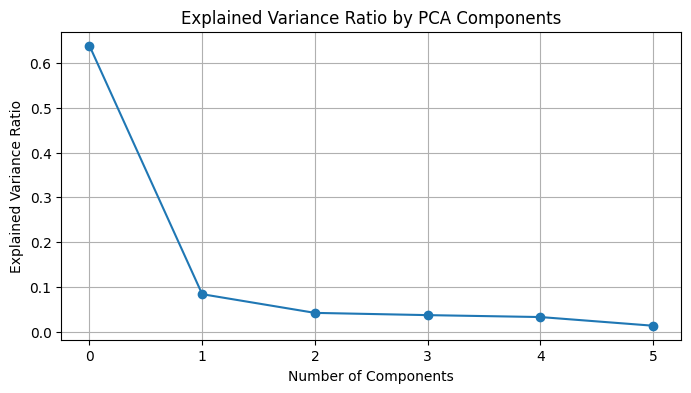

In [82]:
pca = pipe_pca.named_steps['pca']

plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Above elbow point suggests that choosing 2 principal components is a good trade-off between simplicity and capturing the maximum variance in the data.

In [83]:
pipe_pca.named_steps.pca.n_components = 2

In [84]:
pipe_pca

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Prevailing_Wage',
                                                   'CPI_Average',
                                                   'State_Minimum_Wage_Yearly',
                                                   'State_Minimum_Wage_2020_Dollars_Yearly',
                                                   'Federal_Minimum_Wage_2020_Dollars_Yearly',
                                                   'Effective_Minimum_Wage_2020_Dollars_Yearly',
                                                   'Population_2020',
                                                   'Land_area',
                                                   'Population_density',
                                                   'Oneadult_nokids',
                                                   'O...
                                                   'Twoadults_bothworking_nokids',
                                                   'Twoadults_bothworking_onekid',
                                                   'Twoadults_bothworking_twokids',
                                                   'Twoadults_bothworking_threekids',
                                                   'Average_living_wage_year']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['SOC_Title',
                                                   'Full_Time_Position',
                                                   'Unit_Of_Pay',
                                                   'Employer_Location',
                                                   'Case_Status',
                                                   'Worksite_state',
                                                   'Employer_state'])])),
                ('pca', PCA(n_components=2, random_state=42))])

In [85]:
merge_data_for_clustering_pca = pipe_pca.fit_transform(merge_data_for_clustering)

In [86]:
merge_data_for_clustering_pca

array([[-3.98128617,  0.53716883],
       [-6.95165448, -0.28483362],
       [-2.52864374,  1.19905032],
       ...,
       [-3.18007484,  0.25121417],
       [ 1.85879513,  1.67825896],
       [-3.8927935 , -2.64928901]])

### Finding the number of clusters for Kmeans
#### 1. Using Inertia Plot

The inertia plot helps select the optimal number of KMeans clusters by identifying the 'elbow' point where further increases in clusters lead to minimal gains in compactness.

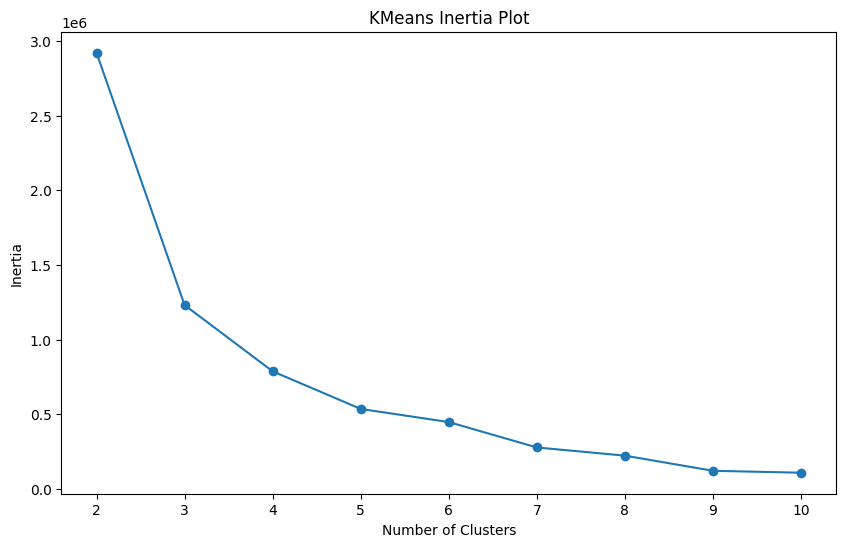

In [87]:
shiluette_scores = []
inertia = []

for k in range(2, 11):
    clusterer = KMeans(n_clusters=k, n_init="auto", random_state=42)
    cluster_labels = clusterer.fit_predict(merge_data_for_clustering_pca)

    inertia.append(clusterer.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('KMeans Inertia Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### 2. Using Silhouette Score Plot
Because of computational resources, Use random samples from data to calculate Silhouette value for choosing the number of clusters.

For n_clusters = 2 The average silhouette_score is : 0.6094834512057722
For n_clusters = 3 The average silhouette_score is : 0.6725026636406727
For n_clusters = 4 The average silhouette_score is : 0.65781839680192
For n_clusters = 5 The average silhouette_score is : 0.6615774742771626
For n_clusters = 6 The average silhouette_score is : 0.6638884659925126
For n_clusters = 7 The average silhouette_score is : 0.6795417904403969
For n_clusters = 8 The average silhouette_score is : 0.6941069975563181
For n_clusters = 9 The average silhouette_score is : 0.7135463375516539
For n_clusters = 10 The average silhouette_score is : 0.7196207647358284
For n_clusters = 11 The average silhouette_score is : 0.714624264707713
For n_clusters = 12 The average silhouette_score is : 0.7184198245625036
For n_clusters = 13 The average silhouette_score is : 0.7089571145327416
For n_clusters = 14 The average silhouette_score is : 0.7274917151639463
For n_clusters = 15 The average silhouette_score is : 0.738821

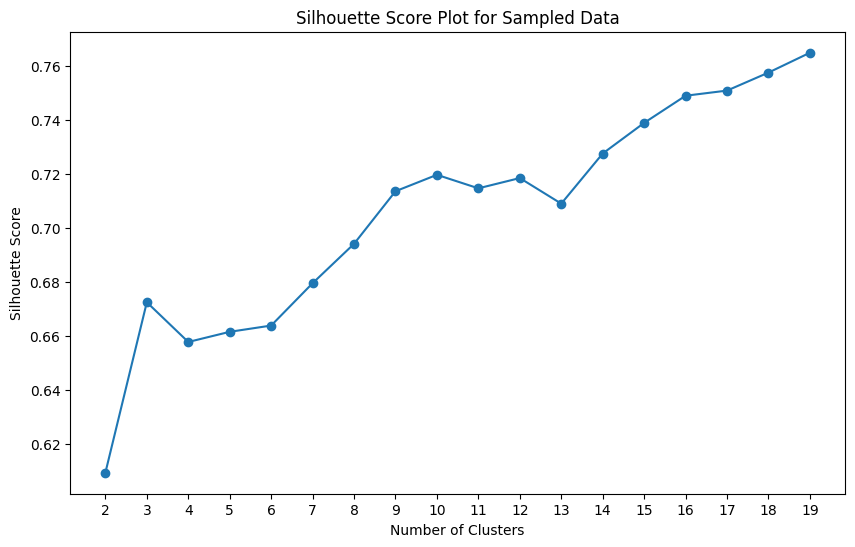

In [88]:
sample_data = shuffle(merge_data_for_clustering_pca, random_state=42)[:int(0.1 * len(merge_data_for_clustering_pca))]

silhouette_scores = []
range_n_clusters = list(range(2, 20))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(sample_data)
    silhouette_avg = silhouette_score(sample_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score Plot for Sampled Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

From the Silhouette Score Plot, the score generally increases as the number of clusters increases, suggesting there isn't a clear peak. Based on the elbow point observed in the inertia plot, it suggests that 3 to 4 clusters may be an optimal range for the number of clusters. Comparing the silhouette scores across 3 to 5 clusters indicates that 3 clusters provide a good trade-off in terms of cluster cohesion and separation.

In [89]:
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_labels = clusterer.fit_predict(merge_data_for_clustering_pca)

silhouette_avg = silhouette_score(merge_data_for_clustering_pca, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.6714927704671037


In [90]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(
    merge_data_for_clustering_pca, cluster_labels)

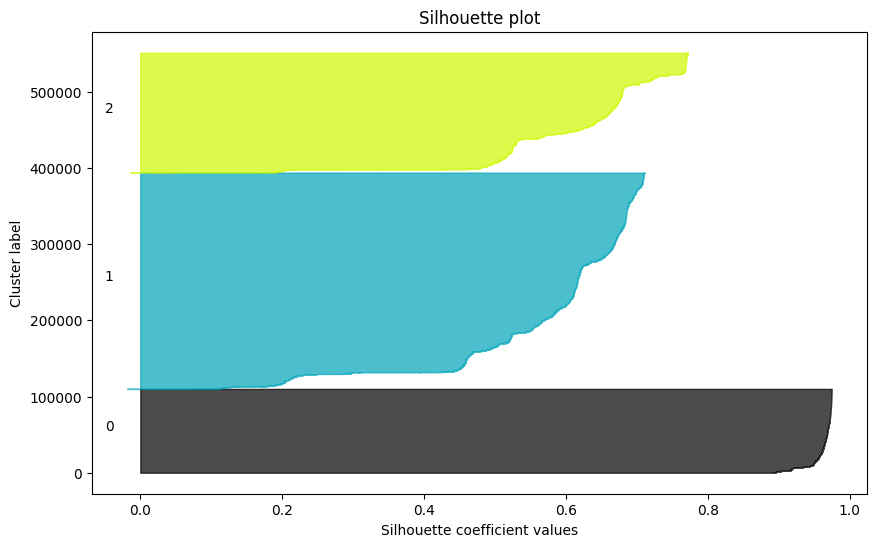

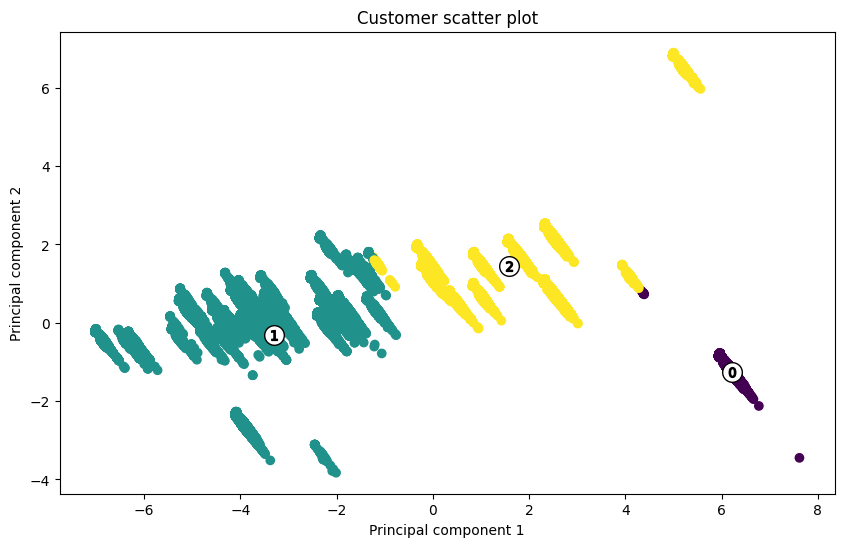

In [91]:
# Visaulize the clustered data
plt.figure(figsize=(10, 6))
plt.title("Silhouette plot")
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merge_data_for_clustering_pca[:, 0], merge_data_for_clustering_pca[:, 1],
            c=cluster_labels, cmap='viridis')
# Center point of the clusters
centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')


plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Customer scatter plot")
plt.show()

From the silhouette plot, most of the points are over **0.5** and **0.7**, which suggests that the cluster qualities are moderate to strong.

In [108]:
cluster_labels_df = pd.DataFrame(cluster_labels, columns=['cluster_labels'])
cluster_labels_df.head()

,cluster_labels
0,1
1,1
2,1
3,1
4,1


In [93]:
cluster_labels_df.shape

(551238, 1)

In [94]:
merge_data_for_clustering.shape

(551238, 29)

In [95]:
merge_data_for_clustering.Case_Status.value_counts()

Case_Status
1    547831
0      3407
Name: count, dtype: int64

#### Change the type of Case_Status to float to see the accepted ratio

In [96]:
merge_data_for_clustering.Case_Status = merge_data_for_clustering.Case_Status.astype(float)

/var/folders/ds/2gb2x6p93mvcg0033697ys2c0000gn/T/ipykernel_6084/301634313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data_for_clustering.Case_Status = merge_data_for_clustering.Case_Status.astype(float)


In [97]:
merge_data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551238 entries, 0 to 561869
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   SOC_Title                                   551238 non-null  object 
 1   Full_Time_Position                          551238 non-null  object 
 2   Prevailing_Wage                             551238 non-null  float64
 3   Unit_Of_Pay                                 551238 non-null  object 
 4   Employer_Location                           551238 non-null  object 
 5   Case_Status                                 551238 non-null  float64
 6   Worksite_state                              551238 non-null  object 
 7   Employer_state                              551238 non-null  object 
 8   CPI_Average                                 551238 non-null  float64
 9   State_Minimum_Wage_Yearly                   551238 non-null  float64
 10  S

#### Concatenate the cluster label with original data

In [98]:
merge_data_for_clustering.reset_index(drop=True, inplace=True)
cluster_labels_df.reset_index(drop=True, inplace=True)
kmeans_df = pd.concat([merge_data_for_clustering, cluster_labels_df], axis=1)

In [99]:
kmeans_df = pd.concat([merge_data_for_clustering, cluster_labels_df], axis=1)

kmeans_df

,SOC_Title,Full_Time_Position,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Case_Status,Worksite_state,Employer_state,CPI_Average,State_Minimum_Wage_Yearly,...,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage_year,cluster_labels
0,"Computer Occupations, All Other",Y,95118.0,Year,"Hudson, Ohio",1.0,Ohio,Ohio,258.66,18096.0,...,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.800000,1
1,"Software Developers, Applications",Y,39.0,Hour,"Irvine, California",1.0,Tennessee,California,258.66,0.0,...,21.44,25.58,28.97,31.06,10.72,14.45,17.82,20.53,49072.400000,1
2,Mechanical Engineers,Y,39.0,Hour,"Southfield, Michigan",1.0,Michigan,Michigan,258.66,20072.0,...,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.000000,1
3,"Software Developers, Applications",Y,53.0,Hour,"Troy, Michigan",1.0,Michigan,Michigan,258.66,20072.0,...,22.20,26.03,29.66,31.79,11.10,16.96,22.71,27.72,57174.000000,1
4,"Computer Occupations, All Other",Y,65333.0,Year,"Clive, Iowa",1.0,Ohio,Iowa,258.66,18096.0,...,21.89,25.95,29.55,31.53,10.94,15.66,20.28,23.97,53008.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551233,Financial Managers,Y,119517.0,Year,"Irvine, California",0.0,California,California,258.66,27040.0,...,30.26,36.85,40.83,46.49,15.13,21.76,27.08,33.24,73954.400000,0
551234,Computer And Information Research Scientists,Y,120765.0,Year,"Cleveland, Ohio",0.0,Illinois,Ohio,258.66,19240.0,...,24.57,28.87,32.53,34.93,12.29,16.98,21.34,25.08,57543.200000,1
551235,Database Administrators,Y,117000.0,Year,"Milwaukee, Wisconsin",0.0,Wisconsin,Wisconsin,258.66,15080.0,...,22.98,27.26,30.98,33.24,11.49,16.51,21.24,25.25,55822.000000,1
551236,Financial Analysts,Y,131685.0,Year,"New York, New York",0.0,New Jersey,New York,258.66,22880.0,...,26.38,31.53,35.18,39.12,13.19,19.60,25.11,30.56,65828.533333,2


In [100]:
kmeans_df.columns

Index(['SOC_Title', 'Full_Time_Position', 'Prevailing_Wage', 'Unit_Of_Pay',
       'Employer_Location', 'Case_Status', 'Worksite_state', 'Employer_state',
       'CPI_Average', 'State_Minimum_Wage_Yearly',
       'State_Minimum_Wage_2020_Dollars_Yearly',
       'Federal_Minimum_Wage_2020_Dollars_Yearly',
       'Effective_Minimum_Wage_2020_Dollars_Yearly', 'Population_2020',
       'Land_area', 'Population_density', 'Oneadult_nokids', 'Oneadult_onekid',
       'Oneadult_twokids', 'Oneadult_threekids', 'Twoadults_oneworking_nokids',
       'Twoadults_oneworking_onekid', 'Twoadults_oneworking_twokids',
       'Twoadults_oneworking_threekids', 'Twoadults_bothworking_nokids',
       'Twoadults_bothworking_onekid', 'Twoadults_bothworking_twokids',
       'Twoadults_bothworking_threekids', 'Average_living_wage_year',
       'cluster_labels'],
      dtype='object')

#### The ratio of Visa acceptance per cluster.
the reason showing the similar ratio among the clusters is that the denied cases are really small compared to accepted cases.

In [101]:
cluster_case_status_distribution = kmeans_df.groupby(['cluster_labels', 'Case_Status']).size().unstack(fill_value=0)

cluster_case_status_distribution['approval_rate'] = cluster_case_status_distribution[1] / (cluster_case_status_distribution[0]
                                                                                            + cluster_case_status_distribution[1])

print(cluster_case_status_distribution)

Case_Status      0.0     1.0  approval_rate
cluster_labels                             
0                704  109310       0.993601
1               1711  282113       0.993972
2                992  156408       0.993698


#### Use groupby() to group the data with cluster labels and analyze the mean values to see the clusters' characteristics.

In [102]:
group_by_kmeans = kmeans_df.groupby('cluster_labels')
group_by_kmeans_mean = group_by_kmeans.mean(numeric_only=True)
group_by_kmeans_mean

,Prevailing_Wage,Case_Status,CPI_Average,State_Minimum_Wage_Yearly,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly,Population_2020,Land_area,Population_density,...,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage_year
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,108018.348581,0.993601,258.66,27039.342047,27039.342047,15080.0,27039.342047,3.953407e+07,155762.928627,253.807030,...,66.019590,30.259986,36.849960,40.829953,46.490062,15.129992,21.759901,27.079819,33.239795,73954.156104
1,79530.871113,0.993972,258.66,15817.927899,15817.927899,15080.0,16830.505806,1.365489e+07,96037.591048,188.843043,...,47.555852,23.213527,27.689160,31.257940,33.760510,11.606663,16.175238,20.303629,23.884589,54828.897970
2,91248.385474,0.993698,258.66,25096.439675,25096.439675,15080.0,25096.439675,1.060477e+07,35722.262823,839.982191,...,57.953764,26.343094,31.380605,34.999938,38.951749,13.169682,18.971897,24.023619,29.202181,64390.835164


In [103]:
group_by_kmeans = kmeans_df.groupby('cluster_labels')
group_by_kmeans_mean = group_by_kmeans.mean(numeric_only=True)
group_by_kmeans_mean

,Prevailing_Wage,Case_Status,CPI_Average,State_Minimum_Wage_Yearly,State_Minimum_Wage_2020_Dollars_Yearly,Federal_Minimum_Wage_2020_Dollars_Yearly,Effective_Minimum_Wage_2020_Dollars_Yearly,Population_2020,Land_area,Population_density,...,Oneadult_threekids,Twoadults_oneworking_nokids,Twoadults_oneworking_onekid,Twoadults_oneworking_twokids,Twoadults_oneworking_threekids,Twoadults_bothworking_nokids,Twoadults_bothworking_onekid,Twoadults_bothworking_twokids,Twoadults_bothworking_threekids,Average_living_wage_year
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,108018.348581,0.993601,258.66,27039.342047,27039.342047,15080.0,27039.342047,3.953407e+07,155762.928627,253.807030,...,66.019590,30.259986,36.849960,40.829953,46.490062,15.129992,21.759901,27.079819,33.239795,73954.156104
1,79530.871113,0.993972,258.66,15817.927899,15817.927899,15080.0,16830.505806,1.365489e+07,96037.591048,188.843043,...,47.555852,23.213527,27.689160,31.257940,33.760510,11.606663,16.175238,20.303629,23.884589,54828.897970
2,91248.385474,0.993698,258.66,25096.439675,25096.439675,15080.0,25096.439675,1.060477e+07,35722.262823,839.982191,...,57.953764,26.343094,31.380605,34.999938,38.951749,13.169682,18.971897,24.023619,29.202181,64390.835164


In [104]:
group_by_kmeans_mean.columns

Index(['Prevailing_Wage', 'Case_Status', 'CPI_Average',
       'State_Minimum_Wage_Yearly', 'State_Minimum_Wage_2020_Dollars_Yearly',
       'Federal_Minimum_Wage_2020_Dollars_Yearly',
       'Effective_Minimum_Wage_2020_Dollars_Yearly', 'Population_2020',
       'Land_area', 'Population_density', 'Oneadult_nokids', 'Oneadult_onekid',
       'Oneadult_twokids', 'Oneadult_threekids', 'Twoadults_oneworking_nokids',
       'Twoadults_oneworking_onekid', 'Twoadults_oneworking_twokids',
       'Twoadults_oneworking_threekids', 'Twoadults_bothworking_nokids',
       'Twoadults_bothworking_onekid', 'Twoadults_bothworking_twokids',
       'Twoadults_bothworking_threekids', 'Average_living_wage_year'],
      dtype='object')

In [105]:
group_by_kmeans_mean.to_csv('group_by_kmeans_mean.csv')

### Cluster Analysis Summary

#### Cluster 0:
- **Prevailing Wage**: Highest average prevailing wage at $108,018 which suggests higher-income levels.
- **Case Status**: Very high approval rate at 99.36% which indicates a strong likely towards case approval.
- **CPI Average**: Consumer price index average stands at 258.66.
- **Minimum Wages**: The highest state minimum wage at $27,039.34 yearly reflects higher living costs.
- **Population 2020**: Approximately 39.5 million, representing populous urban centers with a high population density of 253.807.
- **Land Area**: Significant size of 155,762.93, likely encompassing large metropolitan regions.
- **Cost of Living**: Highest cost of living across various family compositions, in alignment with the high wages and dense population.

#### Cluster 1:
- **Prevailing Wage**: Lowest average prevailing wage at $79,530, indicating lower income levels.
- **Case Status**: Slightly higher approval rate at 99.39%, the highest among the clusters.
- **Minimum Wages**: Lowest state minimum wage at $15,817.93 yearly,which suggests lower living costs.
- **Population Density**: Lower density of 188.843, pointing towards more suburban or rural areas.
- **Land Area**: Covers a large area, likely indicative of lower population density regions.

#### Cluster 2:
- **Prevailing Wage**: Median average wage at $91,248, positioned between Clusters 0 and 1.
- **Case Status**: Approval rate at 99.37%, higher than Cluster 0 but lower than Cluster 1.
- **Population Density**: Extremely high population density of 839.982, suggesting very urbanized areas.
- **Minimum Wages**: Moderate state minimum wage and effective minimum wage, neither the highest nor the lowest.

### Conclusion

**Cluster 0** demonstrates high economic activity and wealth, characterized by high prevailing wages and cost of living, but with somewhat lower case approval rates in comparison with the other clusters.

**Cluster 1** displays districts that might be more rural or suburban, with the lowest salaries but unexpectedly the greatest approval ratings, perhaps reflecting a separate set of criteria or less rigorous standards.

**Cluster 2** occupies the middle position vis-à-vis economic conditions and is slightly less likely to approve than Cluster 0 because it is more urban but not as wealthy.

The relatively high approval rates observed in all clusters imply that the overall performance of the administrative process is efficient and uniform, regardless of economic diversity. Their stability suggests that the criteria for case approval do not seem to have significantly fluctuated over the sample period, considering the varying socio-economic realities of the interviewed subjects. The findings serve as an interesting reflection on not only the correlation of economic disparities between regions but also the extent of administrative uniformity in a context of diverse economic worlds.


### Challenges

**1. Computational Constraints and Data Size**  
Due to the extensive size of the dataset, computational constraints were a significant challenge. Initial analyses, such as generating inertia plots and calculating silhouette scores, were conducted using only 10% of the data, selected randomly using `shuffle`. This sampling approach was necessary to determine the optimal number of clusters without overwhelming computational resources.

**2. The Importance of Data Representation and Bias**  
Analyzing the data was challenging due to the lack of a representative sample, as all clusters showed high approval rates. Because there was limited data available on denied cases, we were unable to conduct a thorough analysis. Having more balanced data on case outcomes could have provided a more detailed understanding of the factors affecting approval rates.

**3. Reflections on Cluster Analysis**  
The cluster analysis highlighted significant economic disparities across clusters but also revealed a uniformly high approval rate for cases, which spanned across all clusters. This might suggest that while economic conditions vary, the criteria for case approval could be consistently applied. However, the potential insights from a more detailed analysis of denied cases were constrained by the data available, indicating a need for more detailed data collection in future studies.

## Challenges with Agglomerative Clustering

In the process of clustering analysis, we aimed to refine our insights by using both K-means and Agglomerative Clustering methods. Our approach began with applying PCA to reduce the dataset to four dimensions, which accounted for 80% of the variance, capturing the majority of the information within our data.

With the dimensionality reduced, we proceeded to use a shuffled subset, amounting to 10% of our data, to evaluate the silhouette scores and determine the optimal number of clusters. This preliminary step revealed peaks at 3 and 5 clusters, indicating that these were promising candidates for further analysis.

However, when attempting to apply Agglomerative Clustering to our data, we encountered a recurring issue:


This kernel crash was indicative of a computational resource limitation, a challenge often faced when processing large datasets with hierarchical clustering methods, which tend to be resource-intensive. The inability to progress with Agglomerative Clustering curtailed our exploration of the data's hierarchical structure.

### Moving Forward

To circumvent the limitations posed by our computational resources, the following steps could be considered for future analysis:

1. **Incremental Loading**: Instead of loading the entire dataset into memory, processing data in smaller batches could alleviate memory constraints.
2. **Cloud Computing**: Leveraging cloud-based platforms with scalable resources could provide the necessary computational power to perform Agglomerative Clustering without interruption.
3. **Reassessment of Dimensionality Reduction**: While PCA was instrumental in reducing the complexity of our data, there's room to reassess whether four dimensions are the optimal compromise between information retention and computational efficiency
4. **Sampling Strategy**: Although we successfully applied a shuffled sampling approach to obtain a 10% subset of the data, the lack of prior information on the importance of categorical variables hindered our ability to implement a stratified sampling strategy effectively. Future attempts will focus on identifying key categorical features that could provide a more structured approach to sampling.
5. **Resource Expansion**: To resolve computational resource limitations, we may explore options such as using more powerful local machines or accessing greater computational power through cloud services.

6. **Clustering Methodology**: Since Agglomerative Clustering posed challenges due to its resource demands, we will consider more computationally efficient clustering algorithms that can handle large datasets without compromising the integrity of the analysis.
